## СОДЕРЖАНИЕ <a name = "content"></a>


1. [Загрузка необходимых библиотек](#download_lib)
2. [Загрузка данных](#download_all_df)
3. [Загрузка данных "assessment"](#download_assessment)<br>
    3.1. [Проверка NULL и типов данных](#assessment_null_dtype)<br>
    3.2. [Проверка используемых форматов данных](#assessment_format)<br>
    3.3  [Просмотр уникальных значений в фичах](#assessment_uniq)<br>
    3.4  [Исследование 0 значений в weight](#assessment_zero)<br>
    3.5  [Наличие Exam по каждому предмету в семестре](#assessment_exam)<br>
    3.6  [Замена Null в date](#assessment_date_null)<br>
    3.7  [Сокращение потребляемой памяти](#assessment_memor)<br>
    3.8  [Памятка](#assessment_notes)<br>
    
4. [Загрузка данных "courses](#download_courses)<br>
    4.1 [Проверка NULL и типов данных](#courses_null_dtype)<br>
    4.2 [Исправление `module_presentation_length`](#courses_module_presentation_length)<br>
    4.3 [Проверка используемых форматов данных](#courses_format)<br>
    4.4 [Сокращение потребляемой памяти](#courses_memor)<br>
    4.5 [Памятка](#courses_notes)

5. [Загрузка "studentAssessment"](#download_studentAssessment)<br>
    5.1  [Проверка NULL, типов данных и уникальных значений](#studentAssessment_null_dtype)<br>
    5.2 [Замена Null в score](#studentAssessment_score_null)<br>
    5.3  [Проверка используемых форматов данных и проверка отрицательных значений `date_submitted`](#studentAssessment_format)<br>
    5.4 [Сокращение потребляемой памяти](#studentAssessment_memor)<br>
    5.5 [Памятка](#studentAssessment_notes)<br>
    
6. [Загрузка "studentRegistrationt"](#download_studentRegistrationt)<br>
    6.1  [Проверка NULL, типов данных и уникальных значений](#studentRegistrationt_null_dtype)<br>
    6.2 [Замена и удаление Null в date_registration и date_unregistration](#studentRegistrationt_score_null)<br>
    6.3 [Просмотр date_registration после начала семестра](#studentRegistrationt_date_registration)<br>
    6.4 [Проверка используемых форматов данных](#studentRegistrationt_format)<br>
    6.5 [Сокращение потребляемой памяти](#studentRegistrationt_memor)<br>
    6.5 [Памятка](#studentRegistrationt_notes)<br>
    
7. [JOIN TABLE](#join)<br>
    7.1 [Размеры и кол-во уникальных значений во всех таблицах](#size)<br>
    7.2 [Join `studentRegistrationt_save` and `course_save`](#j_studentRegistrationt_save_course_save)<br>
    7.3.[Join `studentAssessment_save` and `assessment_save`](#j_studentAssessment_save_assessment_save)<br>
    7.4.[Join `df_StAs_as` and `df_StReg_cours`](#j_df_StAs_as_df_StReg_cours)<br>
8. [Вопросы из памятки](#Q_notes)
9. [Определение курса](#course_dif)

10. [Задание 1](#task_1)<br>
    10.1 [Расчет кол-ва успешно сданных курсов по экзаменам](#task_1_exam_pass)<br>
    10.2 [Расчет кол-ва успешно сданных экзаменов](#task_1_2_exam_pass)<br>
    
 11. [Задание 2](#task_2)<br>
    11.1 [Рассчет самого завершаемого экзамена в рамках каждого курса](#task_11_1)<br>
    11.2 [Расчет кол-ва успешно сданных курсов по тестам](#task_11_2)<br>
    
12. [Задание 3](#task_3)<br>
    12.1 [Средний срок сдачи экзамена, по каждому предмету](#task_12_1)<br>
    12.2 [Средний срок сдачи курса](#task_12_2)<br>
    
11. [Задание 4](#task_4)
12. [Задание 5](#task_5)
13. [Задание 6](#task_6)

### 1. Загрузка необходимых библиотек <a name = "download_lib"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlencode
from scipy import stats
import matplotlib.patches as mpatches
import squarify
%matplotlib inline

### 2. Загрузка данных <a name = "download_all_df"></a>

Цикл, формирующий рабочие ссылки для обращения библиотеки pandas к внешнему ресурсу Yandex Disk

In [2]:
#список ссылок для доступа к скачиванию файлов проекта
#последовательность указанных ссылок : ['assessment',  'courses', 'studentAssessment','studentRegistration']

public_key = [  'https://disk.yandex.ru/d/PBW7aUHGuodFDA', 'https://disk.yandex.ru/d/m0Z6QYNT46f9tQ','https://disk.yandex.ru/d/lsmdbYB0iM7p3w', 'https://disk.yandex.ru/d/Yse4Y6RJqg_WaA'] # Сюда вписываете вашу ссылку

#список, в который собирем готовые ссылки для запросов
final_link = []
for i in public_key:
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
# Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=i))
    response = requests.get(final_url)
    df = response.json()['href']
# Загружаем файл и сохраняем его
    download_response = requests.get(final_url)
    final_link.append(df)
print(*final_link, sep = '\n')

https://downloader.disk.yandex.ru/disk/b44e35f08f9f09c801e42dbbd6f441464df0396b8e684b92c1df737a32c2dad4/63434c0f/I7TlrcXn7vP2NSW6_SzAKHtyBU5UQvPJYb9WaS9jyrX1CN8aOLdYoTLoJ5y31abgHM7JOy4RPGiMPia3fuppPQ%3D%3D?uid=0&filename=assessments.csv&disposition=attachment&hash=V0orUDSHK57/gxrbwykaqzhdemPrc7G562C8lPpuJ6SdgJ2zFXijd7v6k27kdzLWq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=8200&hid=07361bb7413da6d033c85305add628df&media_type=spreadsheet&tknv=v2
https://downloader.disk.yandex.ru/disk/49ea2a291b5d81f9db9721f45e2e655702f3769ea1ca50f76f0d6cad02b0749b/63434c10/I7TlrcXn7vP2NSW6_SzAKD0eE9aMmQztCoU0FwX3IP-5_tDbRlk_Ejyr3J544g6J9Ztbosv84_sfrnjSGgxi_A%3D%3D?uid=0&filename=courses.csv&disposition=attachment&hash=lw6g3qgnKTLwLzTv8/lVuJ2J%2BQunQEfgtv%2B5T8Fs/X%2B7kG4daNzDY2s40c1IBve5q/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=526&hid=5e60f4545117c54d9704641c012e6d8f&media_type=spreadsheet&tknv=v2
https://dow

[[go to content]](#content)

### <font color = 'green'>3 Загрузка данных `assessment`</font> <a name = "download_assessment"></a>

In [3]:
#загрузка данных с Yandex Disk

assessment = pd.read_csv(final_link[0])

In [4]:
#просмотр корректности загрузки

assessment.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


[[go to content]](#content)

#### <font color = 'green'> 3.1 Проверка NULL и типов данных</font> <a name = "assessment_null_dtype"></a>

---
- целочисленные данные имеют формат: число с плавающей точкой
     - date - это кол-во дней, от начала семестра
- есть отсутствующие данные по `date` (11 записей)
---

In [5]:
#просмотр наличие NULL и типов данных

assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


---
- Cомнительно, что часть предметов не имеет экзамена. 
<br>(в описании указано: *'обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест'*)
- Исходя из описания, экзамен проводится 'обычно', но необязательно, **<font color = 'green'>следовательно часть предметов может быть засчитана по итогам прохождения всех тестов</font>** (*заключение проверим ниже*)
---

In [6]:
#просмотр отсутствующих записей о дате сдачи для части тестов - это "Exam"
print(f'Кол-во  NULL: {assessment.date.isnull().sum()}')
print(f'Процент отсутствующих date в данных {np.round((len(assessment[assessment.date.isna()]) / len(assessment.date)),2)*100}')
display(assessment[assessment.date.isna()])

Кол-во  NULL: 11
Процент отсутствующих date в данных 5.0


,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [7]:
# просмотр условных дат первого теста в семестре и последнего теста в семестре

assessment.groupby(['code_presentation'])['date'].agg(['min', 'max'])

,min,max
code_presentation,,
2013B,19.0,240.0
2013J,19.0,261.0
2014B,12.0,241.0
2014J,18.0,241.0


[[go to content]](#content)

#### <font color = 'green'> 3.2 Проверка используемых форматов данных</font> <a name = "assessment_format"></a>

---
- проверяю границы значений *(если диапазон значений меньше, чем используемый тип, то лучше сменить тип на меньший)*
- по описательной статистике `max` и `min` значение в численных переменных имеют размер меньше того, в котором они записаны:

    - `id_assessment` range [1752, 40088]<br>
    - `date` range [12, 261]<br>
    - `weight` range [30.384224, 100]<br>
---

In [8]:
# просмотр описательной статистики

assessment.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


[[go to content]](#content)
[[go to paragraph]](#assessment_format)

#### <font color = 'green'> 3.3 Просмотр уникальных значений в фичах `assessment`</font> <a name = "assessment_zero"></a>

---
- в колонке `weight` есть тесты со значением **0**
---

In [9]:
#просмотр уникальных значений в фичах

print(assessment.nunique())
print('Unique data in "code_module" column:', assessment.code_module.unique(), sep = '\n')
print()
print('Unique data in "code_presentation" column:', assessment.code_presentation.unique(), sep = '\n')
print()
print('Unique data in "id_assessment" column:', assessment.id_assessment.unique(), sep = '\n')
print()
print('Unique data in "assessment_type" column:', assessment.assessment_type.unique(), sep = '\n')
print()
print('Unique data in "date" column:', assessment.date.unique(), sep = '\n')
print()
print('Unique data in "weight" column:', assessment.weight.unique(), sep = '\n')

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64
Unique data in "code_module" column:
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']

Unique data in "code_presentation" column:
['2013J' '2014J' '2013B' '2014B']

Unique data in "id_assessment" column:
[ 1752  1753  1754  1755  1756  1757  1758  1759  1760  1761  1762  1763
 14991 14992 14993 14994 14995 14984 14985 14986 14987 14988 14989 14990
 15003 15004 15005 15006 15007 14996 14997 14998 14999 15000 15001 15002
 15015 15016 15017 15018 15019 15008 15009 15010 15011 15012 15013 15014
 15020 15021 15022 15023 15024 15025 24286 24287 24288 24289 24282 24283
 24284 24285 24290 40087 24295 24296 24297 24298 24291 24292 24293 24294
 24299 40088 25341 25342 25343 25344 25345 25346 25347 25334 25335 25336
 25337 25338 25339 25340 25348 25349 25350 25351 25352 25353 25354 25355
 25356 25357 25358 25359 25360 25361 25362 25363 25364

[[go to content]](#content)
[[go to paragraph]](#assessment_zero)

#### <font color = 'green'>3.4 Исследование **0** значений в `weight` </font> <a name = "assessment_uniq"></a>
---
 - в колонке `weight` есть **0** значения, это значит что прохождения теста не имеет значения при оценивании курса. 
 - предположение:
     - тесты с `weight` 0 не проводятся совсем
     - тесты с `weight` 0 - ошибка в данных
 - <font color = 'red'>если окажется, что студенты сдавали тест с 0 весом, это будет интерпретироваться, как ошибка в колонке weight</font>
 - 0 вес имеют тесты приемуществнно FFF и BBB
 ---

In [10]:
#ищим тесты с 0 весом

assessment.query('weight == 0').groupby(['code_presentation', 'code_module', 'assessment_type']).size()

code_presentation  code_module  assessment_type
2013B              FFF          CMA                7
2013J              FFF          CMA                7
                   GGG          CMA                6
                                TMA                3
2014B              FFF          CMA                7
                   GGG          CMA                6
                                TMA                3
2014J              BBB          TMA                1
                   FFF          CMA                7
                   GGG          CMA                6
                                TMA                3
dtype: int64

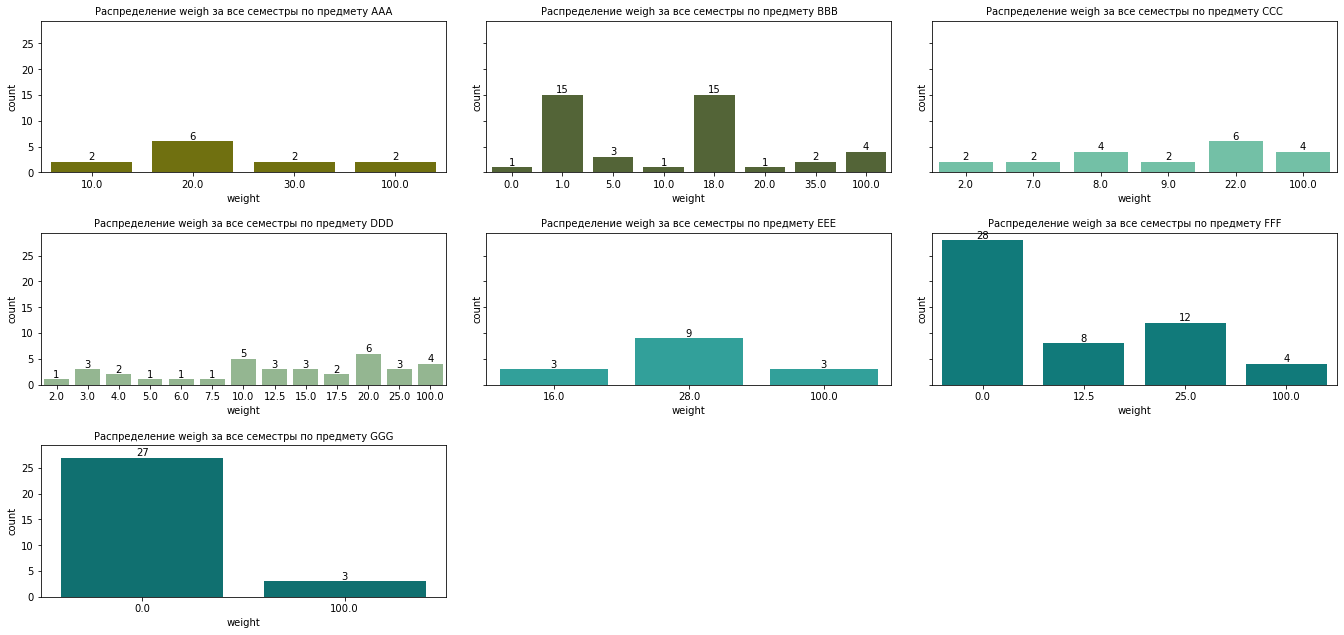

In [11]:
#построим гистограмму по весу оценок по каждому предмету за оба года обучения

modul = ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']
colors = ['#808000', '#556B2F', '#66CDAA', '#8FBC8B', '#20B2AA', '#008B8B', '#008080']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,10), sharey = True)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.4)


for i, j, k in zip(modul, axes.flatten(), colors):
    plt.rcParams['axes.spines.top'] = False # remove  frame's top line
    plt.rcParams['axes.spines.right'] = False # remove  frame's right line
    
    subject = i
    
    sns.countplot(data = assessment.query('code_module == @subject'), x = 'weight', color = k, ax = j)
    
    j.set_title('Распределение weigh за все семестры по предмету ' + subject, fontsize = 10)
    j.bar_label(j.containers[0], fontsize = 10)
    
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
plt.show()

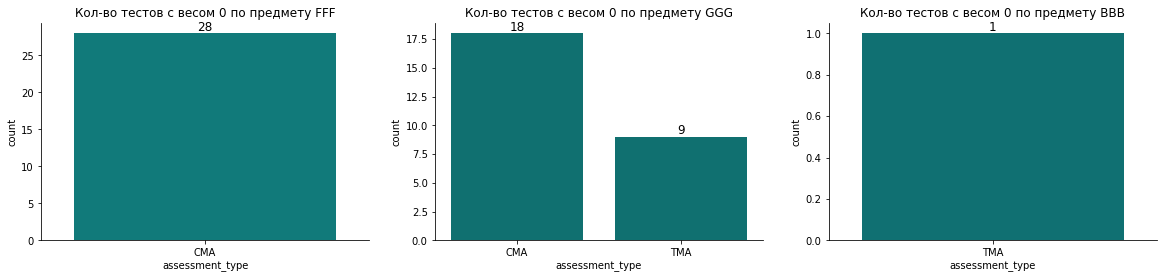

In [12]:
#построение графика распределения 0 значений по предметам GGG, FFF

modul = ['FFF', 'GGG', 'BBB']
colors = ['#008B8B', '#008080', '#008082']

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,4))


for i, j, k in zip(modul, axes.flatten(), colors):
    plt.rcParams['axes.spines.top'] = False # remove  frame's top line
    plt.rcParams['axes.spines.right'] = False # remove  frame's right line
    
    subject = i
    
    sns.countplot(data = assessment.query('code_module == @subject & weight == 0'), x = 'assessment_type', color = k, ax = j)
    j.bar_label(j.containers[0], fontsize = 12)    
    j.set_title('Кол-во тестов с весом 0 по предмету ' + subject, fontsize = 12)
    
    
plt.show()

---
Приемущественно **0** вес имеют предметы `FFF` и `GGG` <br>
- происходит это в 3х семестрах: `2013J`, `2014B`, `2014J` по тестам `CMA` и `TMA`

- По предмету `GGG` **90%** тестов не имеют значения при оценке предмета: **27**
- По предмету `FFF` **54%** тестов не имеют значения при оценке предмета: **28**
- По предмету `ВВВ` **2.4%** тестов не имеют значения при оценке предмета: **1**
---

По предмету `FFF` все **28** 0 значений отнесены к компьютерному тесту `CMA`: 
- либо его вообще не проводят
- либо есть какая -то ошибка<br>

По предмету `GGG` 2/3 тестов `CMA` имеют `weight` 0, остальная 1/3 присвоены 0 значения `TMA`<br>
Тут явно неоднозначная ситуация. <br>
Посмотрим просто таблицу по предмету `FFF` и `GGG`
---

In [13]:
#просмотр полных данных по предмету FFF
assessment[assessment.code_module == 'FFF']

,code_module,code_presentation,id_assessment,assessment_type,date,weight
124,FFF,2013B,34865,CMA,222.0,0.0
125,FFF,2013B,34866,CMA,222.0,0.0
126,FFF,2013B,34867,CMA,222.0,0.0
127,FFF,2013B,34868,CMA,222.0,0.0
128,FFF,2013B,34869,CMA,222.0,0.0
129,FFF,2013B,34871,CMA,222.0,0.0
130,FFF,2013B,34870,CMA,222.0,0.0
131,FFF,2013B,34860,TMA,19.0,12.5
132,FFF,2013B,34861,TMA,47.0,12.5
133,FFF,2013B,34862,TMA,89.0,25.0


In [14]:
#просмотр полных данных по предмету GGG
assessment[assessment.code_module == 'GGG']

,code_module,code_presentation,id_assessment,assessment_type,date,weight
176,GGG,2013J,37418,CMA,229.0,0.0
177,GGG,2013J,37419,CMA,229.0,0.0
178,GGG,2013J,37420,CMA,229.0,0.0
179,GGG,2013J,37421,CMA,229.0,0.0
180,GGG,2013J,37422,CMA,229.0,0.0
181,GGG,2013J,37423,CMA,229.0,0.0
182,GGG,2013J,37415,TMA,61.0,0.0
183,GGG,2013J,37416,TMA,124.0,0.0
184,GGG,2013J,37417,TMA,173.0,0.0
185,GGG,2013J,37424,Exam,229.0,100.0


---

Дата сдачи теста `CMA` по предметам `FFF` и `GGG` **совпадают** с датой сдачи экзамена. <br>
Поэтому, предворительно можно заключить, что **<font color = 'green'>экзамен включает в себя все компьютерные тесты</font>**. И оценка будет выставлена на основе сдачи тестов `ТМА` и `CMA`. <br>
Но в `GGG` тесты `TMA` не имеют веса и даты сдачи не совпадают с датой экзамена, что сомнительно, в данном случае, так как даты тестов проставлены.<br>

**<font color = 'red'> Поэтому, надо после объединения таблиц, посмотреть сдавали ли студенты тесты с id_assessment, который указан по тестам, которые в weight имеют вес 0.</font>**

---

[[go to content]](#content)
[[go to paragraph]](#assessment_uniq)

#### <font color = 'green'> 3.5 Наличие Exam по каждому предмету в семестре</font> <a name = "assessment_exam"></a>

---

**<font color = 'green'>при формулировании,что такое курс, предворительно не будем ограничивать себя обязательным наличием экзамена, не смотря на то, что в системе оценивания указан Exam в каждом семестре по предмету.</font>**

Среди предметов есть один `CCC`, у которого у файле присутствует 2 экзамена в семестре `2014B`. Это может быть ошибкой, ниже <font color = 'red'>проверим, есть ли студенты, которые сдали два экзамена по предмету.</font>

---

In [15]:
assessment.groupby(['code_module','code_presentation', 'assessment_type' ])['weight'].sum()

code_module  code_presentation  assessment_type
AAA          2013J              Exam               100.0
                                TMA                100.0
             2014J              Exam               100.0
                                TMA                100.0
BBB          2013B              CMA                  5.0
                                Exam               100.0
                                TMA                 95.0
             2013J              CMA                  5.0
                                Exam               100.0
                                TMA                 95.0
             2014B              CMA                  5.0
                                Exam               100.0
                                TMA                 95.0
             2014J              Exam               100.0
                                TMA                100.0
CCC          2014B              CMA                 25.0
                                Exam    

[[go to content]](#content)
[[go to paragraph]](#assessment_exam)

#### <font color = 'green'> 3.6 Замена Null в date</font><a name = "assessment_date_null"></a>

---

- <font color = 'green'> Заменим отсутствующие даты в `date`,  чтобы не накапливать пустые ячейки.</font><br>
- Заполнять буду датами максимальной даты по предмету внутри семестра, предполагая, что крайний срок сдачи любого теста не может быть позже последнего теста в семестре<br>
- Возможно, что отсутствие данных означают автоматический зачет.

---

In [16]:
# производим группировку данных внутри одного семестра по предметам.
# определяем, что в каждой группе нужно найти максимум и заполнить им отсутствующие значения

assessment['date'] = assessment.date.fillna(assessment.groupby(['code_presentation', 'code_module'])['date'].transform('max'))

In [17]:
# проверяем наличие пустых записей

assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               206 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


[[go to content]](#content)
[[go to paragraph]](#assessment_date_null)

#### <font color = 'green'>3.7 Сокращение потребляемой памяти</font> <a name = "assessment_memor"></a>

- создаем копию данных, чтобы призводить изменения и далее сравнивать производить проверку

In [18]:
#создание копии данных, для работы с уменьшением потребляемой памяти

assessment_save = assessment.copy()

- цикл для пересохранения переменных в оптимальные типы, для хранения:  `id_assessment`, `date`, `weight` columns

In [19]:
#цикл для пересохранения переменных в оптимальные типы, для хранения:  'id_assessment', 'date', 'weight' columns

change_columns = ['id_assessment', 'date', 'weight']
to_types = ['unsigned','float', 'float']

for i, j in zip (change_columns, to_types):
    assessment_save[i] =  pd.to_numeric(assessment[i], downcast = j, errors = 'coerce')
    print(assessment_save[i].info())


<class 'pandas.core.series.Series'>
RangeIndex: 206 entries, 0 to 205
Series name: id_assessment
Non-Null Count  Dtype 
--------------  ----- 
206 non-null    uint16
dtypes: uint16(1)
memory usage: 540.0 bytes
None
<class 'pandas.core.series.Series'>
RangeIndex: 206 entries, 0 to 205
Series name: date
Non-Null Count  Dtype  
--------------  -----  
206 non-null    float32
dtypes: float32(1)
memory usage: 952.0 bytes
None
<class 'pandas.core.series.Series'>
RangeIndex: 206 entries, 0 to 205
Series name: weight
Non-Null Count  Dtype  
--------------  -----  
206 non-null    float32
dtypes: float32(1)
memory usage: 952.0 bytes
None


- проверка значений после изменения, путем получения суммы по числовым колонкам

In [20]:
# проверка значений после изменения, путем получения суммы по числовым колонкам

pd.concat([assessment[['id_assessment', 'date', 'weight']].sum().to_frame(), 
            assessment_save[['id_assessment', 'date', 'weight']].sum().to_frame()],
           axis = 1, names = ['assessment', 'assessment_save'])

,0,0
id_assessment,5453639.0,5453639.0
date,30533.0,30533.0
weight,4300.0,4300.0


- полное сравнение таблиц до сокращение потребляемой памяти и после

In [21]:
#полное сравнение таблиц до сокращения потребляемой памяти и после

(assessment != assessment_save).sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
date                 0
weight               0
dtype: int64

[[go to content]](#content)
[[go to paragraph]](#assessment_memor)

#### <font color = 'green'>3.8 Памятка </font><a name = "assessment_notes"></a>

- После объединения таблиц:
    - посмотреть сдавали ли студенты тесты с `id_assessment`, которые в `weight` имеют вес 0.
    - сдавали ли студенты оба экзамена по предметк `CCC` в семестре `2014J`
- При формулировании,что такое курс, вернуться к вопросу о необходимости сдачи экзамена
- Пустые значения в `date` заменены максимальной датой сдачи теста в семестре по предмету

[[go to content]](#content)
[[go to paragraph]](#assessment_notes)

### <font color = 'blue'>4. Загрузка данных `courses`</font> <a name = "download_courses"></a>

In [22]:
courses = pd.read_csv(final_link[1])

In [23]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


#### <font color = 'blue'>4.1  Проверка NULL и типов данных</font> <a name = "courses_null_dtype"></a>

---
В данных нет пропусков

---

In [24]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


#### <font color = 'blue'>4.2 Исправление `module_presentation_length`</font> <a name = "courses_module_presentation_length"></a>

---

- колонка `module_presentation_length` - показывает продолжительность семестра `code_module`, поэтому ожидаются равные значения по всем предметам.
- не по всем предметам внутри семестра длительность семестра равная
- **<font color = 'green'>заменим ошибочные значения</font>**. Ошибочное значение то, которое встречается в семестре меньше раз.

---

In [25]:
courses.sort_values(by=['code_presentation','code_module'])

,code_module,code_presentation,module_presentation_length
4,BBB,2013B,240
10,DDD,2013B,240
17,FFF,2013B,240
0,AAA,2013J,268
2,BBB,2013J,268
8,DDD,2013J,261
12,EEE,2013J,268
15,FFF,2013J,268
19,GGG,2013J,261
5,BBB,2014B,234


---
**Ошибочные значения:**
- `2013J` длительность 261 --> 268
- `2014B` длительность 234 --> 241
- `2014J` длительность 262 --> 269

---

In [26]:
courses.groupby(['code_presentation', 'module_presentation_length']).size()

code_presentation  module_presentation_length
2013B              240                           3
2013J              261                           2
                   268                           4
2014B              234                           1
                   241                           5
2014J              262                           2
                   269                           5
dtype: int64

In [27]:
# заменяем значения

courses['module_presentation_length'] = courses.module_presentation_length.replace([261, 234, 262], [268, 241, 269])

# courses.sort_values(by=['code_presentation','code_module'])

courses.groupby(['code_presentation', 'module_presentation_length']).size()

code_presentation  module_presentation_length
2013B              240                           3
2013J              268                           6
2014B              241                           6
2014J              269                           7
dtype: int64

[[go to content]](#content)
[[go to paragraph]](#courses_module_presentation_length)

#### <font color = 'blue'> 4.3 Проверка используемых форматов данных</font> <a name = "courses_format"></a>

- проверяем границы значений *(если диапазон значений меньше, чем используемый тип, то лучше сменить тип на меньший)*
- по описательной статистике min и max значение в численных переменных имеют размер меньше того, в котором они записаны
    - `module_presentation_length` [240,269] 

In [28]:
courses.describe()

,module_presentation_length
count,22.000000
mean,257.136364
std,14.034975
min,240.000000
25%,241.000000
50%,268.000000
75%,269.000000
max,269.000000


[[go to content]](#content)
[[go to paragraph]](#courses_format)

#### <font color = 'blue'>4.4 Сокращение потребляемой памяти</font> <a name = "courses_memor"></a>

In [29]:
#создание копии данных, для работы с уменьшением потребляемой памяти

course_save = courses.copy()

In [30]:
# пересохранения переменной в оптимальный тип

course_save['module_presentation_length'] = pd.to_numeric(course_save['module_presentation_length'], downcast = 'integer', errors = 'coerce')

In [31]:
course_save.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int16 
dtypes: int16(1), object(2)
memory usage: 524.0+ bytes


In [32]:
#полное сравнение таблиц до сокращение потребляемой памяти и после

(courses !=  course_save).sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

[[go to content]](#content)
[[go to paragraph]](#courses_memor)

#### <font color = 'blue'> 4.5 Памятка</font><a name = "courses_notes"></a>
---
- привели время окончания семестра к единым срокам `module_presentation_length`
- после объединения сравнивать сроки сдачи тестов с окончанием семестра по необходимости

---

[[go to content]](#content)
[[go to paragraph]](#courses_notes)

### <font color = 'purple'>5. Загрузка `studentAssessment`</font> <a name = "download_studentAssessment">

In [33]:
# закгрузка данных

studentAssessment = pd.read_csv(final_link[2])

In [34]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


[[go to content]](#content)
[[go to paragraph]](#download_studentAssessment)

#### <font color = 'purple'> 5.1  Проверка NULL, типов данных и уникальных значений</font><a name = "studentAssessment_null_dtype"></a>

---
- В колоке `score` отсутствуют 173 записи - 0,1% от всех записей<br>
- Пояснений об отсутствубщих значениях нет:
    - чтобы не путать возникшые пустые ячейки после merge можно заменить Null на -9999 *(-9999, будет характеризовать, что в исходной таблице не доставало данных)*<br> 
<br>   
- <font color = 'red'>Кол-во уникальных `id_assessment` отличается от того-же параметра в таблице `assessment`</font>
    - таблица `assessment` кол-во `id_assessment` - **206** 
    - таблица `studentAssessment` кол-во `id_assessment` - **188** 
    - кол-во недостающих записей в `studentAssessment` - **18**   
**<font color = 'green'>Следовательно в `assessment` рекомендованный перечень тестов, но не обязательный.</font>**

---

Предположим, что баллы не проставлены у тех, кто уходил в академ и кому засчитан тест на основе раннее сданного:
- среди 173 записей такой случай всего 1 ==> причина иная.

Предположим, что не оценивались конкретные тесты:
- тесты без оценки встречаются и среди оцененных

Предположи, что это означает, что тест был не сдан:
- альтернативой не сдачи является **0** баллов, такое значение присвоено в **329** записях
- **162** `id_assessment` c оценкой **0** встречаются среди `id_assessment` без оценки, косвенно можем пологать, что <u>пропуски связанны с 0 значением</u>
- дополнительно проверили, есть ли студенты, которые сдавали хотябы один тест больше 1 раза - исключаем записи со `score = Null`, как одну из попыток сдать тест.
    - таких студентов нет.

**<font color = 'green'>В результате, есть косвенные основания предпологать, что пропущенные оценки это -  0 баллы, но пока присвоим **-9999**, а после merge, проверим предположение** *(прежде посмотрим по каким семестрам и предметам это сделано)*</font>

---

In [35]:
#проверка наличия Null и типов данных

studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [36]:
#кол-во уникальных значений по фичам

studentAssessment.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

In [37]:
# расчет кол-ва записей у студентов, тест, которых не оценен

print(f'Кол-во записей с пустым "score": {studentAssessment.score.isna().sum()}')

print(f'Процент отсутствующих значений от всего числа записей:{np.round(studentAssessment.score.isna().sum()/len(studentAssessment.score)*100,2)}')

Кол-во записей с пустым "score": 173
Процент отсутствующих значений от всего числа записей:0.1


In [38]:
# просмотр записей с 0 значением 'score'

studentAssessment[studentAssessment.score.isna()]

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


In [39]:
#просмотр сколько из тех, кто получал Null, имеет упоминание о перезачете теста

studentAssessment[studentAssessment.score.isna()&studentAssessment.is_banked == 1]

,id_assessment,id_student,date_submitted,is_banked,score
16612,14997,501208,-1,1,NaN


In [40]:
#посмотрим по каким тестам у части записей нет оценки за тест и сравним, есть ли за эти тесты оцененные записи

id_ass_no_score = studentAssessment[studentAssessment.score.isna()].id_assessment.unique() # тесты, по которым не проставлены оценки
id_student_no_score = studentAssessment[studentAssessment.score.isna()].id_student.unique() # студенты, у которых нет оценок за тест

print(f'Тесты без оценок: {id_ass_no_score}', f'Кол-во: {id_ass_no_score.shape[0]}', sep = '\n')
print(f'Студенты, по которым нет оценки за тест: {id_student_no_score.shape[0]}')

print()

id_ass_no_yes_score = studentAssessment[(studentAssessment.id_assessment.isin(id_ass_no_score))&(studentAssessment.score.notnull())].id_assessment.unique()
print(f'Тесты, по которым есть часть оценок, а части нет: {id_ass_no_yes_score}', f'Кол-во: {id_ass_no_yes_score.shape}', sep = '\n')
print(f'Студенты, у которых есть оценка за тесты, по тестам где у других 160 нет оценки: {studentAssessment[(studentAssessment.id_assessment.isin(id_ass_no_score))&(studentAssessment.score.notnull())].id_student.nunique()}')

print()

print(f'Кол-во совпадений среди тестов с Null и не Null: {(id_ass_no_score == id_ass_no_yes_score).sum()}')

Тесты без оценок: [ 1752  1754  1760 14984 14985 14986 14987 14988 14989 14997 14998 14999
 15000 15001 15008 15010 15011 15012 15013 15020 15021 15022 15024 24282
 24284 24285 24291 24292 24293 25334 25335 25336 25337 25338 25339 25348
 25349 25350 25353 25355 25356 25357 25358 25359 25360 25363 25364 25365
 25366 25367 30710 30712 30714 30715 30719 30722 34860 34861 34862 34863
 34864 34873 34874 34875 34876 34877 34886 34887 34888 34889 34890 34899
 34900 34902 34903 37415 37427 37435]
Кол-во: 78
Студенты, по которым нет оценки за тест: 160

Тесты, по которым есть часть оценок, а части нет: [ 1752  1754  1760 14984 14985 14986 14987 14988 14989 14997 14998 14999
 15000 15001 15008 15010 15011 15012 15013 15020 15021 15022 15024 24282
 24284 24285 24291 24292 24293 25334 25335 25336 25337 25338 25339 25348
 25349 25350 25353 25355 25356 25357 25358 25359 25360 25363 25364 25365
 25366 25367 30710 30712 30714 30715 30719 30722 34860 34861 34862 34863
 34864 34873 34874 34875 34876 348

In [41]:
#просмотр сколько записей с 0 баллов за тест

studentAssessment[studentAssessment.score == 0]

,id_assessment,id_student,date_submitted,is_banked,score
785,1754,2456480,123,0,0.0
4322,14984,554986,24,0,0.0
4730,14985,141823,46,0,0.0
5391,14985,542259,46,0,0.0
5509,14985,549078,48,0,0.0
...,...,...,...,...,...
173723,37443,2378591,230,0,0.0
173791,37443,641112,233,0,0.0
173793,37443,641452,231,0,0.0
173805,37443,643206,236,0,0.0


In [42]:
#просмотр сколько записей получило за тест 0 баллов и есть ли среди них тесты с Null в score, если да, то будет основание присвоить 0 значения вместо -9999

studentAssessment[(studentAssessment.id_assessment.isin(id_ass_no_score))&(studentAssessment.score==0)].id_assessment.count()

162

In [43]:
#кол-во уникальных студентов, получивших 0 по тесту, который у некотороых оценен как Null

studentAssessment[(studentAssessment.id_assessment.isin(id_ass_no_score))&(studentAssessment.score==0)].id_student.nunique()

146

In [44]:
#проверим, есть ли студенты, которые сдавали один и тот же тест 2 раза
#убедимся, что не оцененные тесты не относятся к попвткам сдачи

studentAssessment.groupby(['id_student','id_assessment'], dropna= False).size().max()

1

[[go to content]](#content)
[[go to paragraph]](#studentAssessment_null_dtype)

#### <font color = 'purple'> 5.2 Замена Null в score</font> <a name = "studentAssessment_score_null"></a>

- по результатам анализа 

In [45]:
#замена данных

studentAssessment.score.replace(np.nan, -9999, inplace = True)

[[go to content]](#content)
[[go to paragraph]](#studentAssessment_score_null)

#### <font color = 'purple'>5.3 Проверка используемых форматов данных и проверка отрицательных значений `date_submitted`</font> <a name = "studentAssessment_format"></a>

---

- Проверим интервал численных переменных, сопоставим с используемым типом и при необходимости изменим тип
- По описательной статистике max и min значение в численных переменных имеют размер меньше того, в котором они записаны

---

- Из описательной статистики следует, что есть студенты, которые сдали некоторые тесты до начала семестра **2057** записей:
    - кол-во тестов, которые отправлены после начала семестра **171855**
    - **1909** тех, кому тест засчитали на основании того, что он был сдан в одном из прошлых семестров
        - у таких студентов `is_band` = **1** и `date_submitted` = **-1**
    ***Студенты, которые получили перезачет по предмету имеют дату отправки теста -1***
    - **148** студентов, у которых дата стоит досрочная
        - кол-во уникальных `id_assessment`, которые сданы "досрочно" **13**
        - а число отправленных решений по тестом изменяется от 2 до 40. <font color = 'green'>После merge посмотрим, что за тип тестов.</font>

- ни у одного студента, у кого тест был сдан после начала семестра нет отметки о том, что тест перезасчитан `is_band` = 1

---

In [46]:
# выводим информацию о пустых ячейках и типах данных

studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173912 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [47]:
#выводим описательную статистику

studentAssessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173912.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,65.777606
std,8829.784254,5.523952e+05,71.484148,0.104194,318.154784
min,1752.000000,6.516000e+03,-11.000000,0.000000,-9999.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [48]:
#выведем записи, у которых тест отправлен на проверку до начала семестра

studentAssessment[studentAssessment.date_submitted<0]

,id_assessment,id_student,date_submitted,is_banked,score
1641,1758,603861,-1,1,61.0
1685,1758,1970390,-1,1,78.0
1690,1758,2073016,-1,1,60.0
1693,1758,2139353,-1,1,65.0
1708,1758,2358969,-1,1,68.0
...,...,...,...,...,...
172516,37440,624767,-1,1,100.0
172526,37440,631446,-1,1,100.0
172717,37441,624767,-1,1,100.0
172727,37441,631446,-1,1,100.0


In [49]:
# кол-во студентов, у которых тест отправлен после начала семестра

studentAssessment.query('date_submitted>=0').groupby('is_banked').size()


is_banked
0    171855
dtype: int64

In [50]:
# кол-во студентов, у которых тест отправлен до начала семестра разделением на тех кто получил переучет теста

studentAssessment.query('date_submitted<0').groupby('is_banked').size()


is_banked
0     148
1    1909
dtype: int64

In [51]:
#студенты, чей тест отправлен до начала семестра и дата отправки = -1

studentAssessment.query('is_banked == 1 & date_submitted == -1').groupby('is_banked').size()

is_banked
1    1909
dtype: int64

<AxesSubplot:>

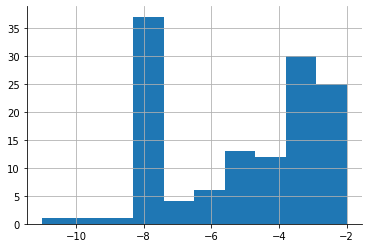

In [52]:
# просмотр записи, которые по date_submitted, сдали тест раньше начала семестра

studentAssessment.query('is_banked == 0 & date_submitted < -1').date_submitted.hist()

In [53]:
#выведем тесты, которые сданы раньше начала семестра и не являются перезачетом

studentAssessment.query('date_submitted<0&is_banked==0').groupby(['id_assessment'], as_index = False)['id_student'].count().sort_values(by = 'id_student', ascending = False)

,id_assessment,id_student
8,34865,40
3,15020,37
12,34904,15
2,15008,11
9,34866,10
0,14984,6
6,25355,5
13,34905,5
1,14996,4
5,25348,4


[[go to content]](#content)
[[go to paragraph]](#studentAssessment_format)

#### <font color = 'purple'> 5.4 Сокращение потребляемой памяти</font> <a name = "studentAssessment_memor"></a>

In [54]:
#создание копии данных, для работы с уменьшением потребляемой памяти

studentAssessment_save = studentAssessment.copy()

In [55]:
#change the types of the 'id_assessment', 'date', 'weight' columns

change_columns = ['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score']
to_types = ['integer','integer', 'integer', 'integer', 'float']

for i, j in zip (change_columns, to_types):
    studentAssessment_save[i] =  pd.to_numeric(studentAssessment[i], downcast = j, errors = 'coerce')
    print(studentAssessment_save[i].info())

<class 'pandas.core.series.Series'>
RangeIndex: 173912 entries, 0 to 173911
Series name: id_assessment
Non-Null Count   Dtype
--------------   -----
173912 non-null  int32
dtypes: int32(1)
memory usage: 679.5 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 173912 entries, 0 to 173911
Series name: id_student
Non-Null Count   Dtype
--------------   -----
173912 non-null  int32
dtypes: int32(1)
memory usage: 679.5 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 173912 entries, 0 to 173911
Series name: date_submitted
Non-Null Count   Dtype
--------------   -----
173912 non-null  int16
dtypes: int16(1)
memory usage: 339.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 173912 entries, 0 to 173911
Series name: is_banked
Non-Null Count   Dtype
--------------   -----
173912 non-null  int8 
dtypes: int8(1)
memory usage: 170.0 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 173912 entries, 0 to 173911
Series name: score
Non-Null Count   Dtype  
--------------   --

In [56]:
# полное сравнение таблиц до сокращения потребляемой памяти и после

(studentAssessment_save != studentAssessment).sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [57]:
# проверка на Null после изменений

studentAssessment_save.isnull().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

[[go to content]](#content)
[[go to paragraph]](#studentAssessment_memor)

#### <font color = 'purple'> 5.5 Памятка </font><a name = "studentAssessment_notes"></a>
---

- пустым значениям в `score`, пока присвоено значение **-9999**
- кол-во недостающих записей в `id_assessment` по сравнению с той же колонкой в таблице `assessment`- **18** 
- те, у кого отметка `is_band` = 1, имеют `date_submitted` = -1
- после объединения ячеек необходимо посмотреть что за типы у тестов, которые не перезачтены но имеют дату отправки до начала семестра
---

[[go to content]](#content)
[[go to paragraph]](#studentAssessment_notes)

### <font color = '#00838F'> 6. Загрузка "studentRegistrationt"</font> <a name = "download_studentRegistrationt">

In [58]:
studentRegistrationt = pd.read_csv(final_link[3])

In [59]:
studentRegistrationt.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


[[go to content]](#content)
[[go to paragraph]](#download_studentRegistrationt)

#### <font color = '#00838F'>6.1  Проверка NULL, типов данных и уникальных значений</font><a name = studentRegistrationt_null_dtype></a>

---

- **<font color = 'green'>в данных есть очень много пустых значений в `date_unregistration` 69 %, это означет, что тако процент студентов окончил предмет</font>**
- в данных `date_registration` отсутствует 0.14% данных

---

In [60]:
studentRegistrationt.nunique()

code_module                7
code_presentation          4
id_student             28785
date_registration        332
date_unregistration      416
dtype: int64

In [61]:
studentRegistrationt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [62]:
#кол-во Null в date_unregistration and date_registration

print(f'Кол-во Null в "date_unregistratio" : {studentRegistrationt.date_unregistration.isna().sum()}')
print(f'Процент Null в "date_unregistratio" : {np.round(studentRegistrationt.date_unregistration.isna().sum()/len(studentRegistrationt.date_unregistration)*100,2)}')
print()
print(f'Кол-во Null в "date_registration" : {studentRegistrationt.date_registration.isna().sum()}')
print(f'Процент Null в "date_registration" : {np.round(studentRegistrationt.date_registration.isna().sum()/len(studentRegistrationt.date_registration)*100,2)}')

Кол-во Null в "date_unregistratio" : 22521
Процент Null в "date_unregistratio" : 69.1

Кол-во Null в "date_registration" : 45
Процент Null в "date_registration" : 0.14


[[go to content]](#content)
[[go to paragraph]](#studentRegistrationt_null_dtype)

#### <font color = '#00838F'>6.2 Замена и удаление Null в date_registration и date_unregistration </font><a name = "studentRegistrationt_score_null"></a>

---

- среди записей о `date_registration` есть 6 записей, где нет данных о `date_registration` и `date_unregistration`.
- в остальных 39 записях отсуствует только `date_registration`
- также как и в других таблицах, заменяю оставшиеся **Null** на **-9999**, чтобы идентифицировать пустые записи в случае merge

---

In [63]:
#проверка записей, у которых нет ни информации о регистрации ни о том, что была произведена отписка
studentRegistrationt[studentRegistrationt.date_registration.isna()&studentRegistrationt.date_unregistration.isna()].id_student.count()

6

In [64]:
# замена отсутсвующих значений о регистрации и отписки на -9999
studentRegistrationt.date_unregistration.fillna(-9999, inplace = True)
studentRegistrationt.date_registration.fillna(-9999, inplace = True)
studentRegistrationt[studentRegistrationt.date_unregistration == -9999]

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,-9999.0
1,AAA,2013J,28400,-53.0,-9999.0
3,AAA,2013J,31604,-52.0,-9999.0
4,AAA,2013J,32885,-176.0,-9999.0
5,AAA,2013J,38053,-110.0,-9999.0
...,...,...,...,...,...
32587,GGG,2014J,2620947,-23.0,-9999.0
32588,GGG,2014J,2640965,-4.0,-9999.0
32589,GGG,2014J,2645731,-23.0,-9999.0
32590,GGG,2014J,2648187,-129.0,-9999.0


In [65]:
#проверка есть ли Null
studentRegistrationt.isna().sum()

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64

In [66]:
#студенты, которые снялись с регистрации, но данных о регистрации у них нет

student_not_reg_but_unreg = studentRegistrationt[(studentRegistrationt.date_registration==-9999)&(studentRegistrationt.date_unregistration!=-9999)]
student_not_reg_but_unreg.shape

(39, 5)

[[go to content]](#content)
[[go to paragraph]](#studentRegistrationt_score_null)

#### <font color = '#00838F'> 6.3 Просмотр date_registration после начала семестра</font> <a name = "studentRegistrationt_date_registration"></a>

---

- есть 234 студента, которые `date_registration` после начала семестра это **0.72%** записей, это могут быть, те кто был вольным слушателем, и после решил зарегистрироваться и аттестоваться по курсу
- дата регистрации после начала курса не превышает срок курса `module_presentation_lenght`

- более яркая ситуация с `date_unregistration` после начала семестра: **6975** регистрации снято или **21.4%**
---

In [67]:
# проверка регистрации после начала семестра

print(f'регистрация после начала семестра: {studentRegistrationt[studentRegistrationt.date_registration >0].id_student.count()}')
print(f'процент регистраций после начала семестра: {np.round(studentRegistrationt[studentRegistrationt.date_registration >0].id_student.count()/len(studentRegistrationt.date_registration)*100,2)}')

регистрация после начала семестра: 234
процент регистраций после начала семестра: 0.72


In [68]:
#на какие курсы регистрировались после начала экзамена

studentRegistrationt.query('date_registration > 0').groupby(['code_presentation', 'code_module']).agg({'date_registration':['min', 'max']})

date_registration       
                                            min    max
code_presentation code_module                         
2013B             BBB                       2.0   69.0
                  DDD                       2.0  167.0
                  FFF                       3.0   17.0
2013J             AAA                       2.0   48.0
                  BBB                       1.0   32.0
                  DDD                       2.0  101.0
                  EEE                       2.0   17.0
                  FFF                       4.0   13.0
                  GGG                       3.0    3.0
2014B             BBB                       3.0   81.0
                  CCC                       5.0   12.0
                  DDD                       2.0   82.0
                  EEE                       3.0   12.0
                  FFF                       2.0   40.0
                  GGG                       2.0    6.0
2014J             AAA                       2.0   10.0
                  BBB                       3.0   44.0
                  CCC                       2.0   37.0
                  DDD                       4.0   13.0
                  EEE                       2.0   83.0
                  FFF                       2.0  110.0
                  GGG                       2.0   19.0

In [69]:
# проверка снятия с предмета после начала семестра

print(f'снятие с регистрации после начала семестра: {studentRegistrationt[studentRegistrationt.date_unregistration >0].id_student.count()}')
print(f'процент снятия с регистрации после начала семестра: {np.round(studentRegistrationt[studentRegistrationt.date_unregistration >0].id_student.count()/len(studentRegistrationt.date_unregistration)*100,2)}')

снятие с регистрации после начала семестра: 6975
процент снятия с регистрации после начала семестра: 21.4


[[go to content]](#content)
[[go to paragraph]](#studentRegistrationt_date_registration)

#### <font color = '#00838F'> 6.4 Проверка используемых форматов данных</font><a name = "studentRegistrationt_format"></a>

---

- проверяем границы значений, чтобы изменить тип записи данных на менее ресурсный
- по описательной статистике max и min значение в численных переменных имеют размер меньше того, в котором они записаны

---

In [70]:
studentRegistrationt.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,-83.120731,-6893.698647
std,5.491673e+05,371.979145,4643.736311
min,3.733000e+03,-9999.000000,-9999.000000
25%,5.085730e+05,-101.000000,-9999.000000
50%,5.903100e+05,-57.000000,-9999.000000
75%,6.444530e+05,-29.000000,-10.000000
max,2.716795e+06,167.000000,444.000000


[[go to content]](#content)
[[go to paragraph]](#studentRegistrationt_format)

#### <font color = '#00838F'> 6.5 Сокращение потребляемой памяти</font> <a name = "studentRegistrationt_memor"></a>

In [71]:
# создание копии данных, для работы с уменьшением потребляемой памяти

studentRegistrationt_save = studentRegistrationt.copy()

In [72]:
#цикл для пересохранения переменных в оптимальные типы, для хранения: 'id_student', 'date_registration', 'date_unregistration'

change_columns = ['id_student', 'date_registration', 'date_unregistration']
to_types = ['integer', 'float', 'float']

for i, j in zip (change_columns, to_types):
    studentRegistrationt_save[i] =  pd.to_numeric(studentRegistrationt[i], downcast = j, errors = 'coerce')
    print(studentRegistrationt_save[i].info())

<class 'pandas.core.series.Series'>
RangeIndex: 32593 entries, 0 to 32592
Series name: id_student
Non-Null Count  Dtype
--------------  -----
32593 non-null  int32
dtypes: int32(1)
memory usage: 127.4 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 32593 entries, 0 to 32592
Series name: date_registration
Non-Null Count  Dtype  
--------------  -----  
32593 non-null  float32
dtypes: float32(1)
memory usage: 127.4 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 32593 entries, 0 to 32592
Series name: date_unregistration
Non-Null Count  Dtype  
--------------  -----  
32593 non-null  float32
dtypes: float32(1)
memory usage: 127.4 KB
None


In [73]:
#проверка на Null после изменений

studentRegistrationt_save.isna().sum()

code_module            0
code_presentation      0
id_student             0
date_registration      0
date_unregistration    0
dtype: int64

[[go to content]](#content)
[[go to paragraph]](#studentRegistrationt_memor)

#### <font color = '#00838F'> 6.5 Памятка</font> <a name = "studentRegistrationt_notes"></a>

- в данных **-9999** в  `date_unregistration` означет, что студент окончил курс
- в `date_registration` пустые значения заменены на **-9999**
- регистрация после начала семестра, пока не расценивается как ошибка
- 6 записей, где `date_unregistration` и `date_registration` отсутствуют, похоже на ошибку. <font color = 'green'>Проверим будут ли после **merge** такие студенты.</font>

[[go to content]](#content)
[[go to paragraph]](#studentRegistrationt_notes)

### <font color = '#A93226'>7. JOIN TABLE</font> <a name = "join">

#### <font color = '#A93226'>7.1 Размеры и кол-во уникальных значений во всех таблицах</font><a name = "size">

In [74]:
print('assessment_save')
print(assessment_save.shape)
print(assessment_save.nunique())
print()
print('course_save')
print(course_save.shape)
print(course_save.nunique())
print()
print('studentAssessment_save')
print(studentAssessment_save.shape)
print(studentAssessment_save.nunique())
print()
print('studentRegistrationt_save')
print(studentRegistrationt_save.shape)
print(studentRegistrationt_save.nunique())

assessment_save
(206, 6)
code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

course_save
(22, 3)
code_module                   7
code_presentation             4
module_presentation_length    4
dtype: int64

studentAssessment_save
(173912, 5)
id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               102
dtype: int64

studentRegistrationt_save
(32593, 5)
code_module                7
code_presentation          4
id_student             28785
date_registration        333
date_unregistration      417
dtype: int64


[[go to content]](#content)
[[go to paragraph]](#size)

#### <font color = '#A93226'>7.2. Join `studentRegistrationt_save` and `course_save` </font><a name = "j_studentRegistrationt_save_course_save">

---

- объединение `studentRegistrationt_save` and `course_save` по:
    - `code_module`
    - `code_presentation`
- тип join - **left**, потому что в таблице`studentRegistrationt_save` записи о студентах, зарегистрировавшихся на разные курсы, и необходимо заполнить по студентам и их тестам информацию о том, какая длительность у семестра.

---

In [75]:
# merge two table studentRegistrationt_save and course_save by 'code_module', 'code_presentation' columns

df_StReg_cours = studentRegistrationt_save.merge(course_save, how='left', on = ['code_module', 'code_presentation'] )

In [76]:
#список колонок

df_StReg_cours.columns

Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration', 'module_presentation_length'],
      dtype='object')

In [77]:
# кол-во записей в новой таблице, соотвествует кол-ву записей в studentRegistrationt_save

df_StReg_cours.shape

(32593, 6)

In [78]:
# кол-во пустых записей

df_StReg_cours.isna().sum()

code_module                   0
code_presentation             0
id_student                    0
date_registration             0
date_unregistration           0
module_presentation_length    0
dtype: int64

In [79]:
# кол-во уникальных записей соответствует studentRegistrationt_save and course_save

df_StReg_cours.nunique()

code_module                       7
code_presentation                 4
id_student                    28785
date_registration               333
date_unregistration             417
module_presentation_length        4
dtype: int64

[[go to content]](#content)
[[go to paragraph]](#j_studentRegistrationt_save_course_save)

#### <font color = '#A93226'>7.3. Join `studentAssessment_save` and `assessment_save` </font><a name = "j_studentAssessment_save_assessment_save">

---
- объединение `studentAssessment_save` and `assessment_save` по:
    - `id_assessment`
- тип join - **left**, потому что в таблице`studentAssessment_save` записи о студентах, и их мы дополняем информациях о требованях к тестам, к какому предмету эти тесты относятся, какой крайних срок  сдачи
---

In [80]:
# merge two table studentAssessment_save and assessment_save by 'id_assessment' columns

df_StAs_as = studentAssessment_save.merge(assessment_save, how = 'left', on  = 'id_assessment')

In [81]:
#список колонок

df_StAs_as.columns

Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score',
       'code_module', 'code_presentation', 'assessment_type', 'date',
       'weight'],
      dtype='object')

In [82]:
# кол-во пустых записей 

df_StAs_as.isna().sum()

id_assessment        0
id_student           0
date_submitted       0
is_banked            0
score                0
code_module          0
code_presentation    0
assessment_type      0
date                 0
weight               0
dtype: int64

In [83]:
# кол-во уникальных записей соответствует studentAssessment_save and assessment_save

df_StAs_as.nunique()

id_assessment          188
id_student           23369
date_submitted         312
is_banked                2
score                  102
code_module              7
code_presentation        4
assessment_type          3
date                    72
weight                  24
dtype: int64

In [84]:
df_StAs_as.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


[[go to content]](#content)
[[go to paragraph]](#j_studentAssessment_save_assessment_save)

#### <font color = '#A93226'>7.4. Join `df_StAs_as` and `df_StReg_cours` </font><a name = "j_df_StAs_as_df_StReg_cours">

---
- объединение таблиц `df_StAs_as` and `df_StReg_cours`, чтобы приступить к анализу по:
    - `id_student`
    - `code_module` 
    - `code_presentation`
- использую `outer`, чтобы избежать ситуации, если студент упомянут только в одной из таблиц.
- после объединения оказалось **6750** на половину пустых строк, в которых нет данных по резульатам тестирования, типу теста баллам по тестам, поэтому эти строки удаляем
---

In [85]:
print(df_StAs_as.shape)
df_StAs_as.nunique()

(173912, 10)


id_assessment          188
id_student           23369
date_submitted         312
is_banked                2
score                  102
code_module              7
code_presentation        4
assessment_type          3
date                    72
weight                  24
dtype: int64

In [86]:
print(df_StReg_cours.shape)
df_StReg_cours.nunique()

(32593, 6)


code_module                       7
code_presentation                 4
id_student                    28785
date_registration               333
date_unregistration             417
module_presentation_length        4
dtype: int64

In [87]:
# outer merge df_StReg_cours and df_StAs_as

df_edu = df_StReg_cours.merge(df_StAs_as, how = 'outer', on = ['id_student', 'code_module', 'code_presentation'])

In [88]:
#cписок колонок

df_edu.columns

Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration', 'module_presentation_length', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight'],
      dtype='object')

In [89]:
#количество пустых записей

df_edu.isna().sum()

code_module                      0
code_presentation                0
id_student                       0
date_registration                0
date_unregistration              0
module_presentation_length       0
id_assessment                 6750
date_submitted                6750
is_banked                     6750
score                         6750
assessment_type               6750
date                          6750
weight                        6750
dtype: int64

In [90]:
#удаление пустых ячеек

df_edu.dropna(subset=['id_assessment', 'date_submitted', 'is_banked', 'score', 'assessment_type', 'date', 'weight'], how = 'all', inplace = True)

In [91]:
#количество пустых записей

df_edu.isna().sum()

code_module                   0
code_presentation             0
id_student                    0
date_registration             0
date_unregistration           0
module_presentation_length    0
id_assessment                 0
date_submitted                0
is_banked                     0
score                         0
assessment_type               0
date                          0
weight                        0
dtype: int64

In [92]:
df_edu.nunique()

code_module                       7
code_presentation                 4
id_student                    23369
date_registration               313
date_unregistration             251
module_presentation_length        4
id_assessment                   188
date_submitted                  312
is_banked                         2
score                           102
assessment_type                   3
date                             72
weight                           24
dtype: int64

[[go to content]](#content)
[[go to paragraph]](#j_df_StAs_as_df_StReg_cours)

### <font color = '#34495E'> 8. Вопросы из памятки</font><a name = "Q_notes">

---
- посмотреть сдавали ли студенты тесты с `id_assessment`, которые в `weight` имеют вес 0.
- по всем предметам и семестрам, по которым отмечается 0 `weight`, студенты сдавали тесты:
    -кол-во таких тестов 46987 или 27% от всего кол-ва тестов
    -экзамены сдавались только по предметам `CCC` и `DDD`<br>
    
**<font color = 'green'> Определить сдан ли предмет или нет, по предметам, где в семестрах не проводились экзамены, получится только на основе зачета всех пройденных тестов.<br>
    Поэтому будем считать, что колонка `weight` заполнена некорректо и опираться на требуемое кол-во тестов для получение зачета по предмету.<font>**

- сдавали ли студенты оба экзамена по предмету `CCC` в семестре `2014J`:
    - нет ниодного студента, который бы сдавал в одном семестре 2 разных экзамена по одному предмету `CCC`

---
[[go to paragraph]](#Q_notes)

In [93]:
# проверяем есть ли студенты, которые сдавали тесты с весом 0

print(df_edu[df_edu.weight == 0].id_student.count())

print(np.round(df_edu[df_edu.weight == 0].id_student.count()/(df_edu.id_student.count())*100))

46987
27.0


In [94]:
#кол-во студентов, которые сдавали тесты с весом 0 разделенные на семестр и предметы

df_edu[df_edu.weight == 0].groupby(['code_presentation', 'code_module', 'assessment_type'], as_index = False)['id_student'].nunique()


,code_presentation,code_module,assessment_type,id_student
0,2013B,FFF,CMA,1094
1,2013J,FFF,CMA,1477
2,2013J,GGG,CMA,729
3,2013J,GGG,TMA,816
4,2014B,FFF,CMA,936
5,2014B,GGG,CMA,594
6,2014B,GGG,TMA,686
7,2014J,BBB,TMA,1776
8,2014J,FFF,CMA,1462
9,2014J,GGG,CMA,534


In [95]:
#по всем предметам и семестрам, которые были выявлены, как аномальные c весом равным 0, студенты сдавали тесты и до начала семестра

df_edu[df_edu.weight == 0].query('date_submitted < 0').groupby(['code_presentation', 'code_module', 'assessment_type'], as_index = False)['id_student'].nunique()

,code_presentation,code_module,assessment_type,id_student
0,2013B,FFF,CMA,41
1,2013J,FFF,CMA,30
2,2014B,FFF,CMA,28
3,2014J,BBB,TMA,37
4,2014J,FFF,CMA,64
5,2014J,GGG,CMA,2
6,2014J,GGG,TMA,3


In [96]:
# теперь можно убедиться, что по предметам, где вес тестов равен 0 у нас нет экзаменов, поэтому сдача тестов для нас все таки важна и не может иметь вес 0.

df_edu.query('assessment_type == "Exam"').groupby(['code_presentation', 'code_module', 'assessment_type'], as_index = False)['id_student'].nunique()

,code_presentation,code_module,assessment_type,id_student
0,2013B,DDD,Exam,602
1,2013J,DDD,Exam,968
2,2014B,CCC,Exam,747
3,2014B,DDD,Exam,524
4,2014J,CCC,Exam,1168
5,2014J,DDD,Exam,950


In [97]:
#проверим есть ли студенты, которые сдавали 2 разных экзамента по предмету CCC

# таких студентов нет, это значит, что нет студентов, которые сдавали бы экзамен в нескольких семестрах по одному предмету

df_edu.query('assessment_type == "Exam"&code_module == "CCC"').groupby(['id_student'], as_index = False)['assessment_type'].nunique().max()

id_student         2697181
assessment_type          1
dtype: int64

---

- проверка сколько записей с весом = 0 - в объединенном df_edu, чтобы снять вопрос поставленный о 0 весе тестов.
- кол-во тестов с весом 0, равно 27%
- кол-во записей о том, что тест был сдан успешно score > 40 26 %

---

[[go to paragraph]](#Q_notes)

In [98]:
#процент тестов с весом 0
print(f'Процент записей с weight = 0 : {np.round(df_edu.query("weight==0").weight.count()/len(df_edu.weight)*100,2)}')

#процент успешных сдачь теста с весом 0
print(f'Процент записей с weight = 0, где по тесту score > 40 : {np.round(df_edu.query("weight==0&score>40").weight.count()/len(df_edu.weight)*100,2)}')

Процент записей с weight = 0 : 27.02
Процент записей с weight = 0, где по тесту score > 40 : 26.12


---
- после объединения сравнивать сроки сдачи тестов с окончанием семестра по необходимости
    - 52183 тестов были сданы после `deadline` или 30% от всех отправленных тестов, что достаточно много.
    - остальные 69.99% тестов отправлены вовремя
    - Так как много кто не укладывается в срок сдачи теста, то возможно фактическая дата сдачи тестов, отличается от плановой. Поэтому контрольным сроком для сдачи, будет окончание семестра `module_presentation_length`
**<font  color = 'green'> Дополним условие по успешной сдачи предмета условием, что тесты должны быть сданы в срок до окончания семестра `module_presentation_length`, кроме того что `score => 40`</font>**

---
[[go to paragraph]](#Q_notes)

In [99]:
df_edu.columns

Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration', 'module_presentation_length', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight'],
      dtype='object')

In [100]:
# функция для расчета разницы между требуемым сроком отправки теста и реальным

def deadline_sub(k, y):
    if k >= 0: # условие для тестов, которые были отправлены посчле начала семестра
        i = y - k
    else:     # условие для тестов, котрые были отправлены до начала семестра. У них разница будет равна периоду от начала семестра до требуемой сдачи теста (условно считаем, что тест сдан в 0 день семестра)
        i = y
    return i

In [101]:
# рассчитываем разницу между окончательной датой сдачи теста и реальной

df_edu['deadline'] = df_edu.apply(lambda x: deadline_sub(x['date_submitted'], x['date']), axis = 1)

In [102]:
# кол-во тестов отправленных после контрольного срока

(df_edu.deadline < 0).sum()

52183

In [103]:
# расчет процента отправленных тестов после срока

print(f'Процент тестов, отправленных после контрольной даты: {np.round(df_edu[df_edu.deadline < 0].shape[0] / df_edu.shape[0]*100,2)}')

print(f'Процент тестов, отправленных вовремя: {np.round(df_edu[df_edu.deadline >= 0].shape[0] / df_edu.shape[0]*100,2)}')

Процент тестов, отправленных после контрольной даты: 30.01
Процент тестов, отправленных вовремя: 69.99


In [104]:
# определим по каким предметам и семестрам тесты отправлялись после deadline

df_edu.query('deadline < 0').groupby(['code_presentation','code_module']).size()

code_presentation  code_module
2013B              BBB            6350
                   DDD            5907
                   FFF            1384
2013J              AAA             386
                   BBB            7696
                   DDD             988
                   EEE             426
                   FFF            1623
                   GGG             561
2014B              BBB            5493
                   CCC            5276
                   DDD             648
                   EEE             286
                   FFF            1025
                   GGG             508
2014J              AAA             429
                   BBB             906
                   CCC            7806
                   DDD            1911
                   EEE             442
                   FFF            1669
                   GGG             463
dtype: int64

---
- проверим по каким типам, тесты были сданы до начала семестра и не являются перезачетом:
    - `CMA` and `TMA` по предметам `FFF` семестр 20213В и `BBB` семестр 2014J соответственно
    - у этих же тестов, вес равен 0
    - дополнительно проверим, чтобы регистрация на предмета была раньше сдачи, если условие соблюдается, то будем считать, что это "досрочная сдача"

**<font color = 'green'>В данном случае, определим эти сдачи, как досрочные.</font>**

---
[[go to paragraph]](#Q_notes)

In [105]:
# типы тестов с досрочной сдаче и без перезачета

df_edu.query('date_unregistration == -9999&date_submitted<-1&is_banked==0').groupby(['code_presentation', 'code_module', 'assessment_type']).size()

code_presentation  code_module  assessment_type
2013B              BBB          TMA                 5
                   DDD          TMA                 1
                   FFF          CMA                47
                                TMA                 2
2013J              BBB          TMA                 3
                   DDD          TMA                 4
                   FFF          TMA                 4
2014B              BBB          TMA                 7
                   DDD          TMA                 5
2014J              BBB          TMA                25
                   FFF          CMA                 9
                                TMA                 2
dtype: int64

In [106]:
#список тестов, которые были засчитаны до начала семестра у студентов, которые закончили предмет, а вес теста равен 0 

df_edu.query('date_unregistration == -9999&date_submitted<-1&is_banked==0&weight==0&date_registration<date_submitted').groupby(['code_presentation', 'code_module', 'assessment_type']).size()

code_presentation  code_module  assessment_type
2013B              FFF          CMA                47
2014J              BBB          TMA                25
                   FFF          CMA                 9
dtype: int64

---
- проверим есть ли студенты, у которых `date_registration` неизвестна = -9999 и `date_unregistration` = -9999:
    - таких студентов в общей таблице нет, делаем вывод, что эти 6 студентов - были ошибкой в системе.
    
- проверим, что за тесты не имеют оценку:
    - это тесты проводимые преподавателем. Почему именно оценка не проставлена, неизвсетно, но 65 записей снялись с регистрации, можно предположить, что по остальным проста дата снятия с регистрации не указана. Поэтому оставим значение -9999. **<font color = 'green'>И соотвественно эти тесты не будут считаться сданными.</font>**
---
[[go to paragraph]](#Q_notes)

In [107]:
#проверим есть ли среди студентов, те кто получили баллы, но не имеют данных о регистрации и по данным отмены регистрации - закончили курс

df_edu.query('date_registration == -9999 & date_unregistration == -9999')

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,deadline


In [108]:
# не оцененные тесты, у которых вес равен 0

df_edu.query('score == -9999&weight==0').groupby(['code_presentation', 'code_module', 'assessment_type']).size()

code_presentation  code_module  assessment_type
2013J              GGG          TMA                1
2014B              GGG          TMA                1
2014J              BBB          TMA                4
                   GGG          TMA                2
dtype: int64

In [109]:
#не оцененными оказались только тесты, которые проводил преподаватель

df_edu.query('score == -9999&weight>1').groupby(['code_presentation', 'code_module', 'assessment_type']).size()

code_presentation  code_module  assessment_type
2013B              BBB          TMA                16
                   DDD          TMA                18
                   FFF          TMA                14
2013J              AAA          TMA                 2
                   BBB          TMA                10
                   DDD          TMA                 8
                   EEE          TMA                 3
                   FFF          TMA                12
2014B              BBB          TMA                17
                   CCC          TMA                 5
                   DDD          TMA                11
                   EEE          TMA                 2
                   FFF          TMA                11
2014J              AAA          TMA                 1
                   BBB          TMA                 6
                   CCC          TMA                 6
                   DDD          TMA                12
                   EEE          TM

In [110]:
#не оцененные тесты сданные, до начала семестра

df_edu.query('score == -9999&date_submitted<0').groupby(['code_presentation', 'code_module', 'assessment_type']).size()

code_presentation  code_module  assessment_type
2013B              DDD          TMA                1
2013J              BBB          TMA                1
dtype: int64

In [111]:
#кол-во неоцененных тестом преподавателем по предметам

df_edu.query('score == -9999').groupby(['code_module']).size()

code_module
AAA     3
BBB    53
CCC    11
DDD    49
EEE     7
FFF    46
GGG     4
dtype: int64

In [112]:
#неоцененные тесты, студенты, которых снялись с тестов

# df_edu.query('score == -9999&date_unregistration==-9999')
df_edu.query('score == -9999&date_unregistration!=-9999').id_student.nunique()

65

In [113]:
df_edu.query('score == -9999&date_submitted<0')

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,deadline
18501,BBB,2013J,501208,-46.0,-9999.0,268,14997.0,-1.0,1.0,-9999.0,TMA,47.0,18.0,47.0
75815,DDD,2013B,555297,-25.0,5.0,240,25334.0,-2.0,0.0,-9999.0,TMA,25.0,7.5,25.0


[[go to content]](#content)
[[go to paragraph]](#Q_notes)

### <font color = '#CC5500'>9. Определение курса</font> <a name = "course_dif">

---

- визуализируем как распределяются баллы по тестам, в отдельном семестре, по каждому предмету c условиями:
    - тест отправлен до `deadline >= 0`
    - оценка за тест присовена `score >= 0`
    - нет данных о том, что студент снят с курса `date_unregistration == -9999`
- баллы по всем тестам в рамках каждого предмета в семестре имеют распределния унимодальные, однако есть много  одинаковых пиков по сдаче тестов CMA и итогда TMA, есть большое количество тех кто сдал на 100 балов и тех, кто сдал на 0. 
- визуально отметка в 40 баллов, как результат успешной сдачи - справедлива.

---

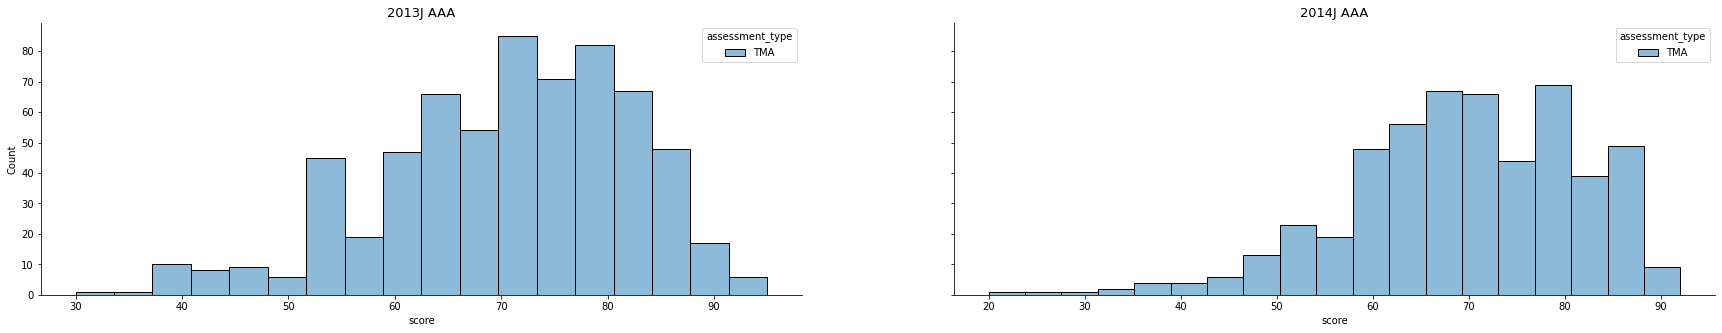

In [114]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (30,5), sharey=True)

semes = ['2013J', '2014J']

for i, j in zip(semes, axes.flatten()):
        presentation = i
        sns.histplot(data = df_edu.query('score>=0&code_presentation == @presentation&code_module =="AAA"&deadline>0&date_unregistration == -9999'), x = 'score', ax = j,  hue = 'assessment_type', stat ='count')
        j.set_title(presentation+' ' + 'AAA', fontsize = 13)
plt.show()

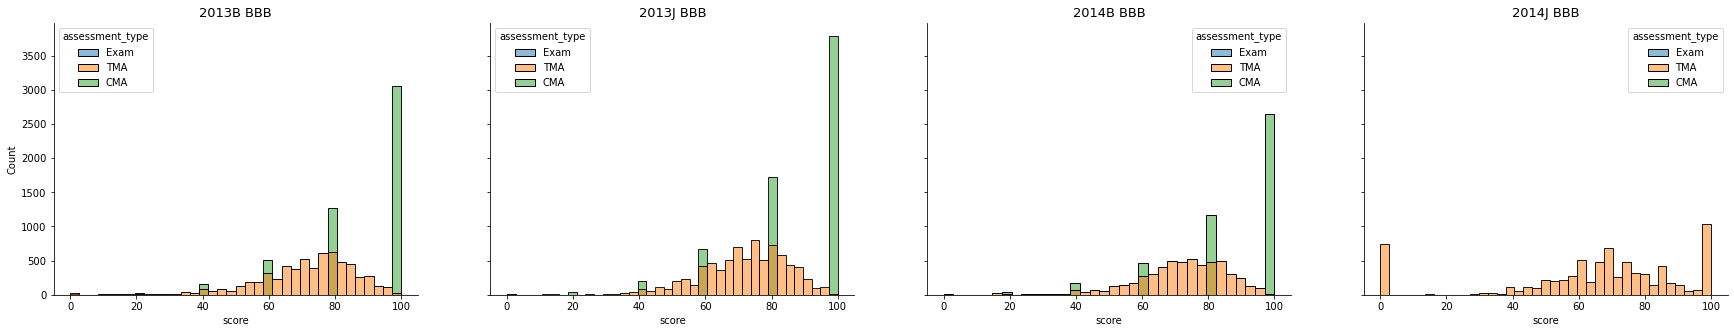

In [115]:
fig, axes = plt.subplots(nrows = 1, ncols=4, figsize = (30,5), sharey=True)

semes = ['2013B', '2013J', '2014B', '2014J']

for i, j in zip(semes, axes.flatten()):
        presentation = i
        sns.histplot(data = df_edu.query('score>=0&code_presentation == @presentation&code_module =="BBB"'), x = 'score', ax = j,  hue = 'assessment_type', stat ='count', hue_order= ['Exam', 'TMA', 'CMA'])
        j.set_title(presentation+' ' + 'BBB', fontsize = 13)

plt.show()

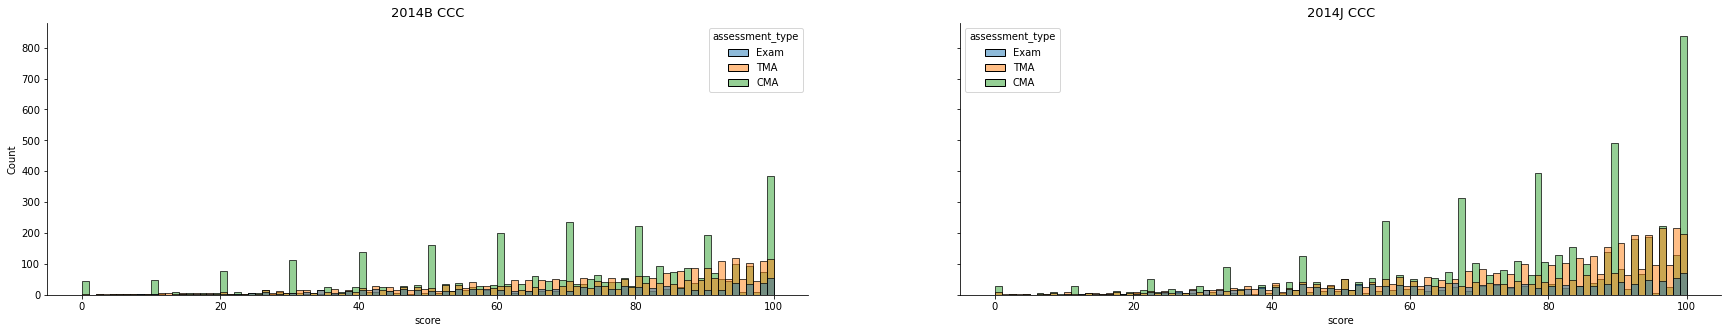

In [116]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (30,5), sharey=True)

semes = ['2014B', '2014J']

for i, j in zip(semes, axes.flatten()):
        presentation = i
        sns.histplot(data = df_edu.query('score>=0&code_presentation == @presentation&code_module =="CCC"'), x = 'score', ax = j,  hue = 'assessment_type', stat ='count', bins = 100, hue_order= ['Exam', 'TMA', 'CMA'])
        j.set_title(presentation+' ' + 'CCC', fontsize = 13)

# fig.delaxes(axes[0])
# fig.delaxes(axes[2])
plt.show()

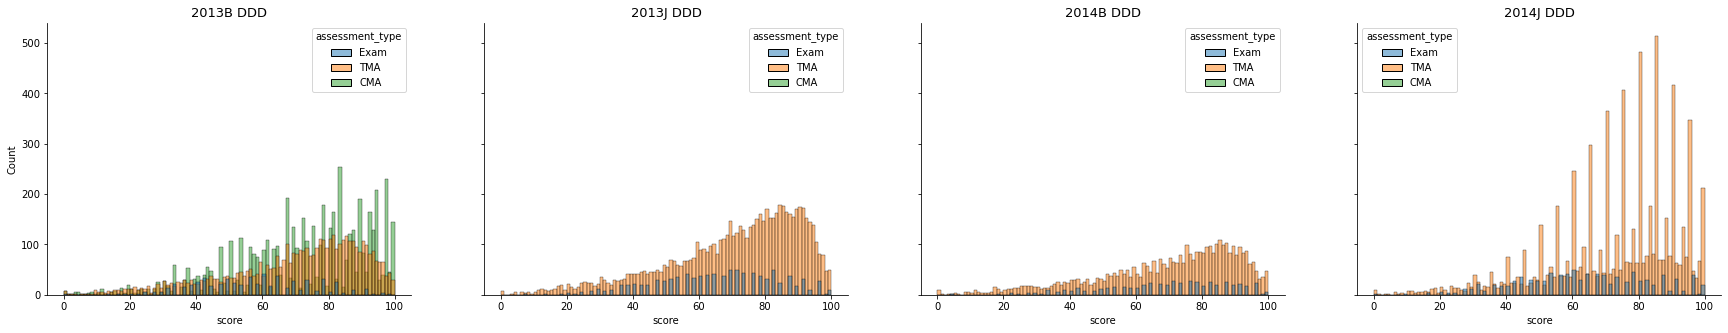

In [117]:
fig, axes = plt.subplots(nrows = 1, ncols=4, figsize = (30,5), sharey=True)

semes = ['2013B', '2013J', '2014B', '2014J']

for i, j in zip(semes, axes.flatten()):
        presentation = i
        sns.histplot(data = df_edu.query('score>=0&code_presentation == @presentation&code_module =="DDD"'), x = 'score', ax = j,  hue = 'assessment_type', stat ='count', hue_order= ['Exam', 'TMA', 'CMA'], bins = 100)
        j.set_title(presentation+' ' + 'DDD', fontsize = 13)

plt.show()

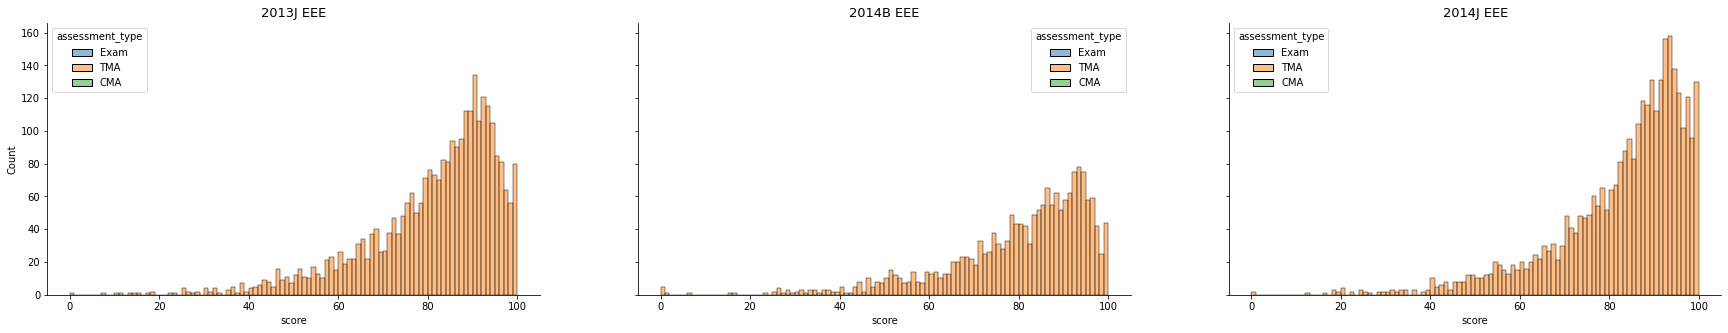

In [118]:
fig, axes = plt.subplots(nrows = 1, ncols=3, figsize = (30,5), sharey=True)

semes = ['2013J', '2014B', '2014J']

for i, j in zip(semes, axes.flatten()):
        presentation = i
        sns.histplot(data = df_edu.query('score>=0&code_presentation == @presentation&code_module =="EEE"'), x = 'score', ax = j,  hue = 'assessment_type', stat ='count', hue_order= ['Exam', 'TMA', 'CMA'], bins = 100)
        j.set_title(presentation+' ' + 'EEE', fontsize = 13)
# fig.delaxes(axes[2])
plt.show()

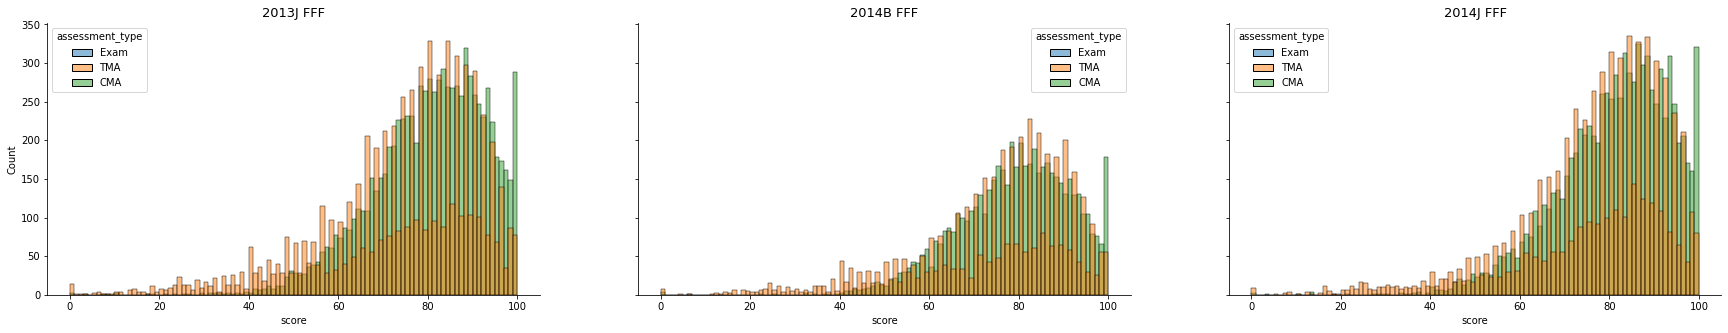

In [119]:
fig, axes = plt.subplots(nrows = 1, ncols=3, figsize = (30,5), sharey=True)

semes = ['2013J', '2014B', '2014J']

for i, j in zip(semes, axes.flatten()):
        presentation = i
        sns.histplot(data = df_edu.query('score>=0&code_presentation == @presentation&code_module =="FFF"'), x = 'score', ax = j, hue = 'assessment_type', stat ='count', hue_order= ['Exam', 'TMA', 'CMA'], bins=100)
        j.set_title(presentation+' ' + 'FFF', fontsize = 13)
# fig.delaxes(axes[2])
plt.show()

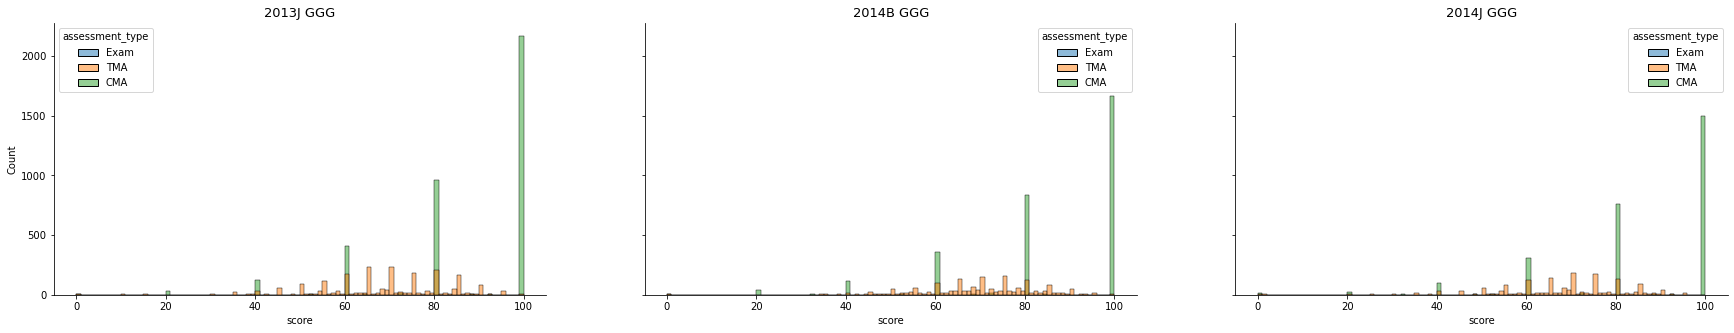

In [120]:
fig, axes = plt.subplots(nrows = 1, ncols=3, figsize = (30,5), sharey=True)

semes = ['2013J', '2014B', '2014J']

for i, j in zip(semes, axes.flatten()):
        presentation = i
        sns.histplot(data = df_edu.query('score>=0&code_presentation == @presentation&code_module =="GGG"'), x = 'score', ax = j, hue = 'assessment_type', stat ='count', hue_order= ['Exam', 'TMA', 'CMA'], bins=100)
        j.set_title(presentation+' ' + 'GGG', fontsize = 13)
# fig.delaxes(axes[2])
plt.show()

---
- оценка `CMA`, по предмету `BBB` имеют округление, судя по всему тест можно сдать только на 0, 20, 40, 60, 80, 100 баллов.
- при проверке веса экзамена, оказывается, что он имеет малый вес, возможно, это означает, что он очень легкий, поэтому его сдает очень много учеников.
---

[[go to paragraph]](#course_dif)

In [121]:
#количество оценок по CMA по предмету BBB

display(df_edu.query('code_module =="BBB"&assessment_type=="CMA"').groupby(['assessment_type', 'score']).size().sort_values(ascending = False))

#вес тестов и кол-во отправленных тестов

display(df_edu.query('code_module =="BBB"&assessment_type=="CMA"').groupby(['assessment_type', 'score', 'weight']).size().sort_values(ascending = False))

assessment_type  score
CMA              100.0    9494
                 80.0     4170
                 60.0     1649
                 40.0      529
                 20.0      100
                 0.0        16
dtype: int64

assessment_type  score  weight
CMA              100.0  1.0       9494
                 80.0   1.0       4170
                 60.0   1.0       1649
                 40.0   1.0        529
                 20.0   1.0        100
                 0.0    1.0         16
dtype: int64

---

- оценка `CMA`, по предмету `ССС` более разнообразны, но по графикам тоже есть пики с высоким кол-ом сдачи на определенный балл.
- при проверке веса экзамена, вес тоже разнообразный, но веса по прежнему не очень высокие, максимальный вес 8%.
---

[[go to paragraph]](#course_dif)

In [122]:
#количество оценок по CMA по предмету CCC

display(df_edu.query('code_module =="CCC"&assessment_type=="CMA"').groupby(['assessment_type', 'score']).size().sort_values(ascending = False))

#вес тестов и кол-во отправленных тестов

display(df_edu.query('code_module =="CCC"&assessment_type=="CMA"').groupby(['assessment_type', 'score', 'weight'], as_index = False).agg({'id_student' : 'count'}).sort_values(by = 'weight', ascending = False))

assessment_type  score
CMA              100.0    1220
                 89.0      544
                 78.0      448
                 67.0      357
                 96.0      314
                          ... 
                 18.0        3
                 14.0        2
                 5.0         1
                 16.0        1
                 99.0        1
Length: 98, dtype: int64

,assessment_type,score,weight,id_student
207,CMA,100.0,8.0,363
74,CMA,39.0,8.0,18
155,CMA,76.0,8.0,29
88,CMA,45.0,8.0,5
86,CMA,44.0,8.0,21
...,...,...,...,...
60,CMA,33.0,2.0,60
158,CMA,78.0,2.0,351
84,CMA,44.0,2.0,102
163,CMA,80.0,2.0,192


---
- оценка `CMA`, по предмету `GGG` более разнообразны, но по графикам тоже есть пики с высоким кол-ом сдачи на определенный балл.
- при проверке веса экзамена, вес всех тестов 0%.
---

[[go to paragraph]](#course_dif)

In [123]:
#количество оценок по CMA по предмету GGG 

display(df_edu.query('code_module =="GGG"&assessment_type=="CMA"').groupby(['assessment_type', 'score']).size().sort_values(ascending = False))

#вес тестов и кол-во отправленных тестов
display(df_edu.query('code_module =="GGG"&assessment_type=="CMA"').groupby(['assessment_type', 'score', 'weight']).size().sort_values(ascending = False))

assessment_type  score
CMA              100.0    5327
                 80.0     2558
                 60.0     1071
                 40.0      337
                 20.0       97
                 72.0       39
                 0.0        35
                 52.0       24
                 92.0       13
                 48.0       11
                 32.0       10
                 88.0        9
                 68.0        8
                 64.0        5
                 44.0        4
                 84.0        4
                 12.0        3
                 4.0         2
                 28.0        2
dtype: int64

assessment_type  score  weight
CMA              100.0  0.0       5327
                 80.0   0.0       2558
                 60.0   0.0       1071
                 40.0   0.0        337
                 20.0   0.0         97
                 72.0   0.0         39
                 0.0    0.0         35
                 52.0   0.0         24
                 92.0   0.0         13
                 48.0   0.0         11
                 32.0   0.0         10
                 88.0   0.0          9
                 68.0   0.0          8
                 64.0   0.0          5
                 44.0   0.0          4
                 84.0   0.0          4
                 12.0   0.0          3
                 4.0    0.0          2
                 28.0   0.0          2
dtype: int64

---
- распределение баллов по семестрам, тоже стремиться к унимодальному нормальному виду.

---

[[go to paragraph]](#course_dif)

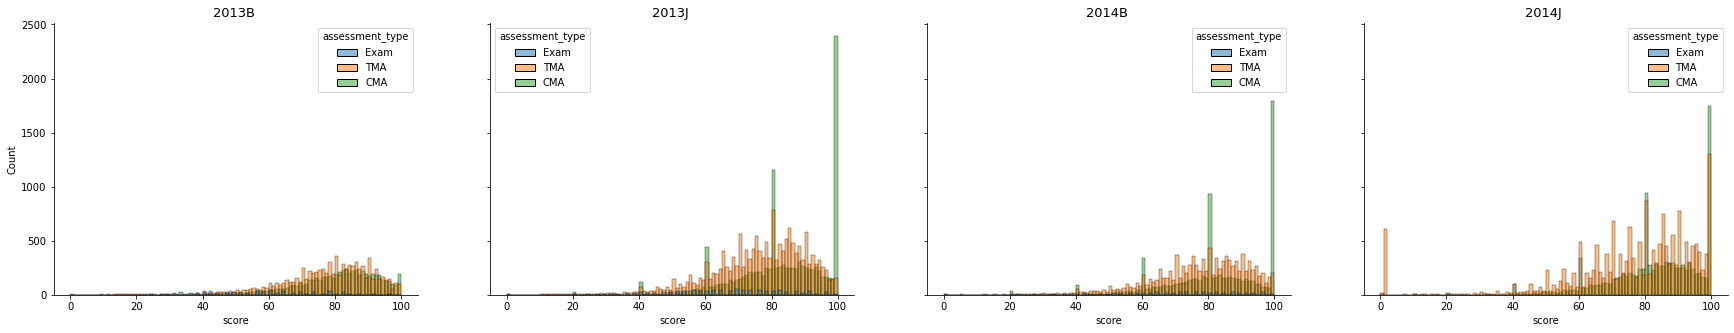

In [124]:

fig, axes = plt.subplots(nrows = 1, ncols=4, figsize = (30,5), sharey=True)

semes = ['2013B','2013J', '2014B', '2014J']

for i, j in zip(semes, axes.flatten()):
        presentation = i
        sns.histplot(data = df_edu.query('score>=0&code_presentation == @presentation&deadline>0'), x = 'score', ax = j, hue = 'assessment_type', stat ='count', hue_order= ['Exam', 'TMA', 'CMA'], bins=100)
        j.set_title(presentation+' ', fontsize = 13)
# fig.delaxes(axes[2])
plt.show()

---
- Проверим дублируются ли студенты в каждом следующем семестре.<br>
*(Если они будут дублироваться в привалюрующем количестве, то логично предположить, что курс захватывает 2 семестра.)*

1. `id_student`, которые сдавали экзамен `DDD` не встречаются среди сдавших экзамен `CCC`
    - один курс закхватывает только 1 предмет, это условие проверили на основе предметов в семестре 2013_B
2.  попарно сверив повторение `id_student` по семестрам, определеили, что кол-во построений незначительно, не превышает 4%:
    - один курс по длительности захватывает только один семестр
---

[[go to paragraph]](#course_dif)

In [125]:
#проверим много ли пересечений по студентам, котоорые сдавали экзамены по предмету CCC или DDD

#также пересечений нет. Это значит что у нас курс не состоит из нескольких предметов, а только из одного и захватывает только один семестр.

df_edu.query('assessment_type == "Exam"&(code_module == "DDD"|code_module == "CCC")').groupby(['id_student'], as_index = False)['assessment_type'].nunique().max()

id_student         2698251
assessment_type          1
dtype: int64

In [126]:
# проверим встречаются ли студенты одни и теже студенты на разных предметах в семестре 2013_B

B_2013_BBB = df_edu.query('code_presentation == "2013B"&code_module=="BBB"').groupby(['id_student'], as_index = False)['id_assessment'].count()
B_2013_DDD = df_edu.query('code_presentation == "2013B"&code_module=="DDD"').groupby(['id_student'], as_index = False)['id_assessment'].count()
B_2013_FFF = df_edu.query('code_presentation == "2013B"&code_module=="FFF"').groupby(['id_student'], as_index = False)['id_assessment'].count()

print(f'Количество студентов, которые встречаются в обоих предметах "BBB" и "DDD": {(B_2013_BBB.id_student.isin(B_2013_DDD.id_student)).sum()}')

print()

print(f'Количество студентов, которые встречаются в обоих предметах "DDD" и "FFF": {(B_2013_FFF.id_student.isin(B_2013_DDD.id_student)).sum()}')

print()

print(f'Количество студентов, которые встречаются в обоих предметах "BBB" и "FFF": {(B_2013_FFF.id_student.isin(B_2013_BBB.id_student)).sum()}')

Количество студентов, которые встречаются в обоих предметах "BBB" и "DDD": 2

Количество студентов, которые встречаются в обоих предметах "DDD" и "FFF": 0

Количество студентов, которые встречаются в обоих предметах "BBB" и "FFF": 0


In [127]:
df_edu.groupby('code_presentation')['id_student'].nunique()

code_presentation
2013B    3803
2013J    7098
2014B    5748
2014J    8613
Name: id_student, dtype: int64

In [128]:
#уникальные студенты, которые учились в 2013B

B_2013 = df_edu.query('code_presentation == "2013B"').groupby(['id_student'], as_index = False)['id_assessment'].count()

print(f'Кол-во уникальных студентов: {B_2013.id_student.count()}')

# display(B_2013.head())

Кол-во уникальных студентов: 3803


In [129]:
#уникальные студенты, которые учились в 2013J
J_2013 = df_edu.query('code_presentation == "2013J"').groupby(['id_student'], as_index = False)['id_assessment'].count()

# print(f'Кол-во уникальных студентов: {J_2013.id_student.count()}')


In [130]:
#уникальные студенты, которые учились в 2014B

B_2014 = df_edu.query('code_presentation == "2014B"').groupby(['id_student'], as_index = False)['id_assessment'].count()

# B_2014.head()

In [131]:
#уникальные студенты, которые учились в 2014J

J_2014 = df_edu.query('code_presentation == "2014J"').groupby(['id_student'], as_index = False)['id_assessment'].count()

# J_2014.head()

In [132]:
#проверка есть ли среди B_2013 и J_2013 общие студенты.
print(f'Количество студентов, которые встречаются в обоих семестрах 2013J и 2013B: {(B_2013.id_student.isin(J_2013.id_student)).sum()}')
#Процент студентов, котрые встречаются в 2013 и J_2013
print(f'Процент студентов, которые встречаются в обоих семестрах 2013J и 2013B: {np.round(99/(len(B_2013.id_student)+len(J_2013.id_student))*100,2)}')

print()

#проверка есть ли сруди B_2014 и J_2014 общие студенты.
print(f'Количество студентов, которые встречаются в обоих семестрах 2014J и 2014B: {(B_2014.id_student.isin(J_2014.id_student)).sum()}')
#Процент студентов, котрые встречаются в B_2014 и J_2014
print(f'Процент студентов, которые встречаются в обоих семестрах 2014J и 2014B: {np.round(527/(len(B_2014.id_student)+len(J_2014.id_student))*100,2)}')

print()

#проверка есть ли сруди B_2013 и B_2014 общие студенты.
print(f'Количество студентов, которые встречаются в обоих семестрах 2013B и 2014B: {(B_2013.id_student.isin(B_2014.id_student)).sum()}')
#Процент студентов, котрые встречаются в B_2013 и B_2014
print(f'Процент студентов, которые встречаются в обоих семестрах 2013B и 2014B: {np.round(201/(len(B_2014.id_student)+len(B_2014.id_student))*100,2)}')

print()

#проверка есть ли сруди B_2014 и J_2014 общие студенты.
print(f'Количество студентов, которые встречаются в обоих семестрах 2013J и 2014J: {(J_2013.id_student.isin(J_2014.id_student)).sum()}')
#Процент студентов, котрые встречаются в B_2014 и J_2014
print(f'Процент студентов, которые встречаются в обоих семестрах 2013J и 2014J: {np.round(669/(len(J_2014.id_student)+len(J_2014.id_student))*100,2)}')

Количество студентов, которые встречаются в обоих семестрах 2013J и 2013B: 99
Процент студентов, которые встречаются в обоих семестрах 2013J и 2013B: 0.91

Количество студентов, которые встречаются в обоих семестрах 2014J и 2014B: 527
Процент студентов, которые встречаются в обоих семестрах 2014J и 2014B: 3.67

Количество студентов, которые встречаются в обоих семестрах 2013B и 2014B: 201
Процент студентов, которые встречаются в обоих семестрах 2013B и 2014B: 1.75

Количество студентов, которые встречаются в обоих семестрах 2013J и 2014J: 669
Процент студентов, которые встречаются в обоих семестрах 2013J и 2014J: 3.88


---
- кол-во тестов по предметам в семестре, или кол-во тестов, в каждом курсе в семестре
---

[[go to paragraph]](#course_dif)

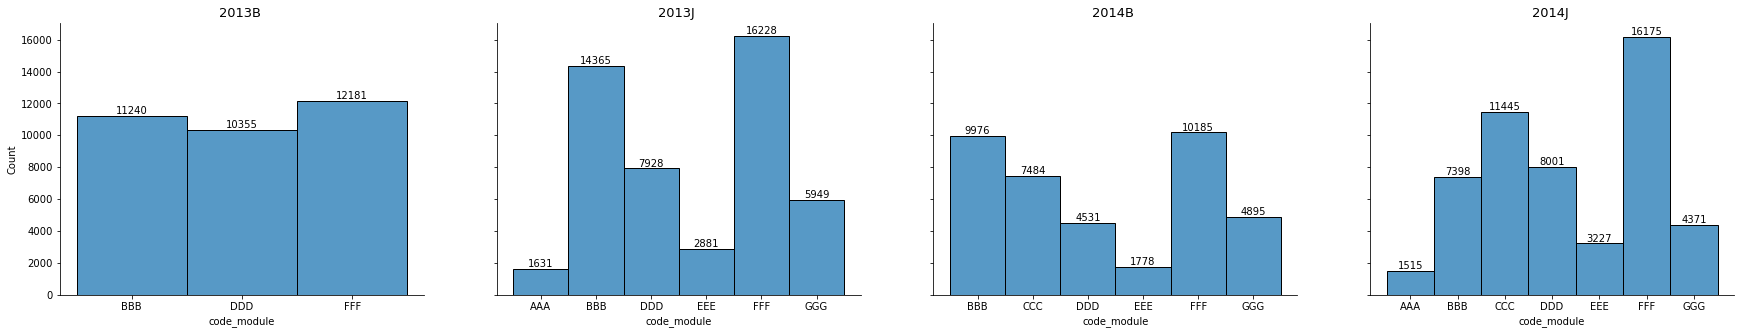

In [133]:
fig, axes = plt.subplots(nrows = 1, ncols=4, figsize = (30,5), sharey=True)

semes = ['2013B','2013J', '2014B', '2014J']

for i, j in zip(semes, axes.flatten()):
        presentation = i
        sns.histplot(data = df_edu.query('score>=0&code_presentation == @presentation'), x = 'code_module', ax = j, stat ='count', bins=100)
        j.set_title(presentation+' ', fontsize = 13)
        j.bar_label(j.containers[0])
# fig.delaxes(axes[2])
plt.show()

---
Курс это предмет, которых проходится в одном семестре.<br>
Дополнительно в рамках поставленных задачь и того как определяется курс, нам не важна последовательность семестров B и J.<br>
Но для себя определим, алфавитную последовательность<br>

**<font color = 'green'>На основе проведенного анализа, курсом будет считаться отдельный предмет, пройденный в течении семестра.</font>**<br>
**<font color = 'green'>Полностью сданным курсом считается семестр, по которому сданы все тесты и экзамены больше чем на 40 баллов в течении одного семестра</font>**
---
[[go to content]](#content)
[[go to paragraph]](#course_dif)

### 10. Задание 1<a name = "task_1">


**Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)**

- `assessment_type` - содержит Exam - экзамен по курсу
- `score` - содержит оценку за экзамен по курсу, если она меньше 40 то курс не сдан
- `id_student` - индивидуальный номер студента
- `deadline` - если > 0, то тест сдан вовремя
- `date_unregistration` - если = -9999, то курс завершен 
- у нас есть досрочная сдача    

Перед, решила убедится, что каждом id_assessment есть только один экзамен<br>
Отбираем только те записи, где значение в Exam в assessment_type больше либо равно 40, чтобы считать только зачтенные курсы, дополнительно отфильтруем по weight , так как знаем, что 100 % - это значение для экзамена.<br>
Группируюсь по студентам, чтобы посчитать количество сданных курсов у каждого.<br>
Потом отбираю, только тех студентов, у которых кол-во сданных экзаментов, только 1

#### 10.1 Расчет кол-ва успешно сданных курсов по экзаменам <a name = "task_1_exam_pass">

Сколько студентов успешно сдали только один курс? (**Успешная сдача — это зачёт по курсу на экзамене**)
- <font color = 'green'>успешно сдало экзамен - **<font size = 4>3792</font>** студента</font>
Но это не учитывает, те курсы , по которым не проводились `Exam`.

In [134]:
#считаем сколько студентов успешно сдали экзамен

(df_edu.
 query('assessment_type == "Exam" & score >= 40 & weight == 100 & date_submitted < module_presentation_length').
 groupby('id_student', as_index = False).
 size().
 query('size == 1').count().to_frame())

,0
id_student,3792
size,3792


[[go to content]](#content)
[[go to paragraph]](#task_1_exam_pass)

#### 10.2 Расчет кол-ва успешно сданных курсов по тестам <a name = "task_1_2_exam_pass">

---
- Посчитаем кол-во студентов, которые сдали успешно, только один курс, учитывая предметы, по которым не сдавался экзамен
    - `df_edu_drop` таблица, где удалены все дублирующиеся записи о пересдаче теста. Чтобы можно было посчитать, какое кол-во тестов, нужно сдать по курсу, чтобы его завершить.*в данном случае нас интересует полная сдача, так как мы знаем, что фактически экзамены проводились в ограниченном числе курсов, то предполагаем, что там где экзамен не сдается, для того, чтобы завершить курс, надо сдать все тесты больше чем на 40 баллов и вовремя*
    - `num_test_exam` кол-во тестов в курсе, которые необходимо сдать (курс- это отдельный предмет, пройденный в одном семестре)
    - `num_pass_tests` кол-во студентов, и тестов, которые они успешно сдали
    - `pass_modul` объединенная таблица, где у каждого студента проставлено кол-во фактически сданных им тестов и среднее время, которое он потратьл на сдачу каждого предмета в курсе, а также утвержденные нормативы по срокам сдачи и кол-ву тестов
    - '_pass' - фактические,
    - '_aim' - утвержденные
    
- поясним, что успешно сданным курсом, считаем тот, у которого все тесты и экзамены были сданы до коннца семестра
- зачет с прошлого курса считается
- не учитываем тех, кто отписался от курса
---

<font color = 'green'>Успешно сдало **только** один курс <font size = 4>**10340</font>** студентов или практически <font size = 4>**45%**</font>. Доля, достаточно большая, но нужно учесть, что это онлайн курс, имеющий гибкую систему.</font>

In [135]:
#удаляю дублирующие строки в df_edu

df_edu_drop = df_edu.drop_duplicates(subset = ['code_presentation', 'code_module', 'assessment_type', 'id_assessment', 'id_student'])

# расчет кол-во уникальных тестов в каждом семестре по отедельному предмету, то есть по отдельному курсу. Это нужно, чтобы определить все ли студенты сдали необходимое кол-во курсов в семестре.

num_test_exam = (df_edu_drop.
                 groupby([ 'code_presentation', 'code_module', 'assessment_type'], as_index = False).
                 agg({'id_assessment':'nunique', 'date' :'mean', 'module_presentation_length':'mean'}).
                 groupby([ 'code_presentation', 'code_module'], as_index = False).agg({'id_assessment':'sum', 'date' :'mean', 'module_presentation_length':'mean'}).
                 rename(columns = {'id_assessment': 'num_tests', 'date' : 'avg_date_submitted'})
                )
num_test_exam

,code_presentation,code_module,num_tests,avg_date_submitted,module_presentation_length
0,2013B,BBB,11,105.088058,240.0
1,2013B,DDD,14,143.811325,240.0
2,2013B,FFF,12,151.967621,240.0
3,2013J,AAA,5,109.236984,268.0
4,2013J,BBB,11,113.117287,268.0
5,2013J,DDD,7,179.842926,268.0
6,2013J,EEE,4,91.077667,268.0
7,2013J,FFF,12,159.953003,268.0
8,2013J,GGG,9,172.804413,268.0
9,2014B,BBB,11,100.179649,241.0


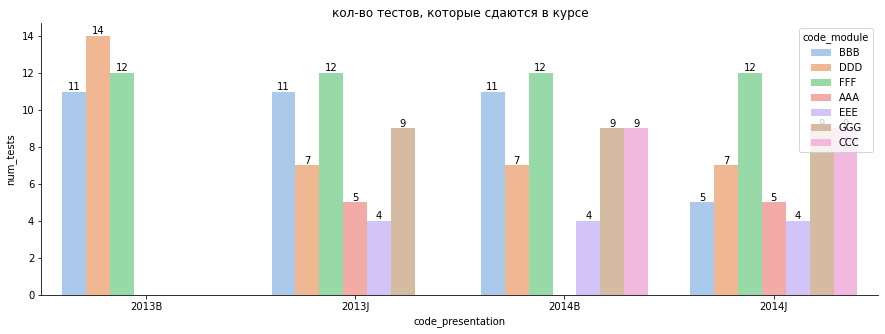

In [136]:
#кол-во тестов, которые надо сдать по предмету в каждом семестре

plt.figure(figsize = (15,5))

ax = sns.barplot(data = num_test_exam, x = 'code_presentation', y = 'num_tests', hue = 'code_module', palette = 'pastel')
ax.set_title('кол-во тестов, которые сдаются в курсе')
for i in ax.containers:
    ax.bar_label(i,)

In [137]:
#отбираю студентов, у которых оценка за тест и экзамен score >40, тесты сданы вовремя, и сортирую по возрастанию времени сдачи тестов и экзаменов

num_pass_tests = df_edu.query('score >= 40 & date_submitted<=module_presentation_length').sort_values(by = 'date_submitted')

#удаляю дубликаты, чтобы исключить студентов, которые сдавали один и тот же тест 2 раза. 
#Удаляю первые втречаемые повторения, чтобы остались только последние сданные тесты.
#Для себя явно указываю параметр keep = 'first', который и отвечает за удаление первых встречаемых повторений

num_pass_tests.drop_duplicates(subset = ['id_student', 'code_module', 'code_presentation', 'id_assessment', 'assessment_type'], keep= 'first', inplace = True)

#считаю сколько экзаменов и тестов сдал каждый студент и среднее время сдачи экзаменов и тестов. 
#Отрицательные значения говорят о досрочной сдачи. Поэтому среднее может сильно смещаться
num_pass_tests = (
                  num_pass_tests.
                  groupby(['id_student', 'code_presentation', 'code_module', 'assessment_type'], as_index = False).
                  agg({'id_assessment':'nunique', 'date_submitted' :'mean'}).
                  groupby(['id_student', 'code_presentation', 'code_module'], as_index = False).
                  agg({'id_assessment':'sum', 'date_submitted' :'mean'}).
                  rename(columns = {'id_assessment': 'num_tests', 'date_submitted' : 'avg_date_submitted'})
                 )
num_pass_tests.head()

,id_student,code_presentation,code_module,num_tests,avg_date_submitted
0,6516,2014J,AAA,5,111.60
1,8462,2013J,DDD,3,55.00
2,8462,2014J,DDD,4,-1.00
3,11391,2013J,AAA,5,112.40
4,23629,2013B,BBB,4,55.75


In [138]:
#объединениe таблицы с данными по сдаче тестов студентами, и тестов, которые необходимо сдать студентам

pass_modul = num_pass_tests.merge(num_test_exam, how = 'left', on=['code_presentation', 'code_module'], suffixes = ['_pass','_aim'])
pass_modul.head()

,id_student,code_presentation,code_module,num_tests_pass,avg_date_submitted_pass,num_tests_aim,avg_date_submitted_aim,module_presentation_length
0,6516,2014J,AAA,5,111.60,5,109.062668,269.0
1,8462,2013J,DDD,3,55.00,7,179.842926,268.0
2,8462,2014J,DDD,4,-1.00,7,141.073837,269.0
3,11391,2013J,AAA,5,112.40,5,109.236984,268.0
4,23629,2013B,BBB,4,55.75,11,105.088058,240.0


In [139]:
pass_modul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25243 entries, 0 to 25242
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_student                  25243 non-null  int32  
 1   code_presentation           25243 non-null  object 
 2   code_module                 25243 non-null  object 
 3   num_tests_pass              25243 non-null  int64  
 4   avg_date_submitted_pass     25243 non-null  float64
 5   num_tests_aim               25243 non-null  int64  
 6   avg_date_submitted_aim      25243 non-null  float32
 7   module_presentation_length  25243 non-null  float64
dtypes: float32(1), float64(2), int32(1), int64(2), object(2)
memory usage: 1.5+ MB


In [140]:
# находим студентов, котoрые сдали только один курс, то есть только один предмет за один семестр в течении всего обучения

(
    pass_modul.
    query('num_tests_pass == num_tests_aim'). #отбор только тех, кто сдал нужное кол-во тестов по предметам
    groupby('id_student', as_index = False).
    agg({'code_presentation':'count', 'code_module': 'count'}). #считаем кол-во курсов, которые завершил студент
    rename(columns = {'code_presentation': 'num_code_presentation', 'code_module':'num_code_module'}).
    query('num_code_presentation==1&num_code_module==1'). #выбираем, только тех, которые полностью завершили только 1 курс
    id_student.nunique()
)

10340

In [141]:
#процент студентов, сдавших один курс, от всего кол-ва студентов

print(f'Процент студентов, сдавших только один курс: {np.round(10343/df_edu.id_student.nunique()*100,2)}')

Процент студентов, сдавших только один курс: 44.26


[[go to content]](#content)
[[go to paragraph]](#task_1_2_exam_pass)

### 11. Задание 2<a name = "task_2">

---
Задание: Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. (10 баллов)


*завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен*

---

#### 11.1 Рассчет самого завершаемого экзамена в рамках каждого курса<a name = "task_11_1">

---
требования к экзамену, чтобы посчитать завершаемость: score > 40, отправка до конца семестра даты

---
- Самый **легкий экзамен в курсе 2014B DDD** - его сдали 91% студентов
- Самым **сложый экзамен в курсе 2013B DDD** - его сдали 79% студентов

In [142]:
#идентификационные номера экзаменов, которые были успешно сданы

df_edu.query('score > 40 & assessment_type == "Exam" & date_submitted <= module_presentation_length').groupby(['code_presentation', 'code_module', 'id_assessment']).size().to_frame()

0
code_presentation code_module id_assessment     
2013B             DDD         25340.0        475
2013J             DDD         25354.0        856
2014B             CCC         24290.0        648
                  DDD         25361.0        475
2014J             CCC         24299.0        994
                  DDD         25368.0        824

In [143]:
#создание колонки, для отслеживания, сдан ли экзамен до deadline

# df_edu['proportion_deadline'] = df_edu.date/df_edu.date_submitted

In [144]:
#считаем самый завершаемый экзамен в курсах

ax_exam = (
    df_edu.query('score > 40 & assessment_type == "Exam" & date_submitted <= module_presentation_length').groupby(['code_presentation', 'code_module', 'id_assessment']).size()
    / df_edu.query('assessment_type == "Exam"' ).groupby(['code_presentation', 'code_module', 'id_assessment']).size()
).mul(100).round(2).reset_index().rename(columns = {0: 'percentage'})

ax_exam['course'] = ax_exam.code_presentation + '_' + ax_exam.code_module
ax_exam.sort_values(by = ['code_presentation', 'percentage'])

,code_presentation,code_module,id_assessment,percentage,course
0,2013B,DDD,25340.0,78.90,2013B_DDD
1,2013J,DDD,25354.0,88.43,2013J_DDD
2,2014B,CCC,24290.0,86.75,2014B_CCC
3,2014B,DDD,25361.0,90.65,2014B_DDD
4,2014J,CCC,24299.0,85.10,2014J_CCC
5,2014J,DDD,25368.0,86.74,2014J_DDD


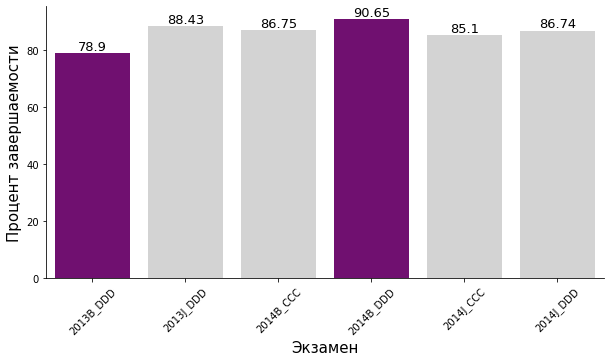

In [145]:
#график с отражением самого завершаемого экзамена в каждом курсе
plt.figure(figsize = (10,5))
plt.rcParams['axes.spines.top'] = False # remove  frame's top line
plt.rcParams['axes.spines.right'] = False # remove  frame's right line

clrs_palette = ['purple' if x == max(ax_exam.percentage) or x == min(ax_exam.percentage) else 'lightgrey' for x in ax_exam.percentage]
axes = sns.barplot( x =ax_exam.course, y = ax_exam.percentage, palette = clrs_palette )
axes.tick_params(axis = 'x', rotation = 45)
axes.set_xlabel('Экзамен', fontsize = 15)
axes.set_ylabel('Процент завершаемости', fontsize = 15)
axes.bar_label(axes.containers[0], fontsize = 13)
plt.show()

[[go to content]](#content)
[[go to paragraph]](#task_12_1)

#### 11.2 Рассчет самого завершаемого курса<a name = "task_11_2">

---
Рассчит доли завершаемости курсов:
1. рассчитываем сколько всего студентоы сделало попыток сдать задания по курсу, с учетом дублирований `num_test_course`
2. рассчитываем кол-во студентов, которые сдали курс `pass_num_test_course`
3. рассчитываем завершаемость курса `pass_num_test_course`

- <font color = 'green'>Самый **легкий курс 2013J AAA** - его сдали 20% студентов</font>
- <font color = 'green'>Самым **сложый курс 2013B DDD** - его сдали 2% студентов</font>
---

In [146]:
#общее кол-во отправленных тестов, в каждом курсе

num_test_course = df_edu.groupby(['code_presentation', 'code_module'], as_index=False)['id_student'].nunique().sort_values(by=['code_presentation', 'code_module', 'id_student'])
num_test_course

,code_presentation,code_module,id_student
0,2013B,BBB,1369
1,2013B,DDD,1065
2,2013B,FFF,1371
3,2013J,AAA,365
4,2013J,BBB,1710
5,2013J,DDD,1507
6,2013J,EEE,827
7,2013J,FFF,1874
8,2013J,GGG,819
9,2014B,BBB,1205


In [147]:
#кол-во студентов, успешно сдавших курс

pass_num_test_course = (
    pass_modul.query('num_tests_pass == num_tests_aim').
    groupby(['code_presentation', 'code_module', 'id_student'], as_index = False)['num_tests_pass'].
    sum().groupby(['code_presentation', 'code_module'], as_index=False)['id_student'].
    nunique()).sort_values(by=['code_presentation', 'code_module', 'id_student'])
pass_num_test_course

,code_presentation,code_module,id_student
0,2013B,BBB,488
1,2013B,DDD,249
2,2013B,FFF,726
3,2013J,AAA,273
4,2013J,BBB,731
5,2013J,DDD,541
6,2013J,EEE,584
7,2013J,FFF,942
8,2013J,GGG,383
9,2014B,BBB,427


In [148]:
#расчет завершаемости курса
# кол-во студентов, успешно сдавших курс / #общее кол-во отправленных тестов, в каждом курсе
pass_num_test_course['proportion'] = np.round(pass_num_test_course.id_student/num_test_course.id_student*100,2)

pass_num_test_course['course'] = pass_num_test_course.code_presentation + '_' + pass_num_test_course.code_module
pass_num_test_course

,code_presentation,code_module,id_student,proportion,course
0,2013B,BBB,488,35.65,2013B_BBB
1,2013B,DDD,249,23.38,2013B_DDD
2,2013B,FFF,726,52.95,2013B_FFF
3,2013J,AAA,273,74.79,2013J_AAA
4,2013J,BBB,731,42.75,2013J_BBB
5,2013J,DDD,541,35.90,2013J_DDD
6,2013J,EEE,584,70.62,2013J_EEE
7,2013J,FFF,942,50.27,2013J_FFF
8,2013J,GGG,383,46.76,2013J_GGG
9,2014B,BBB,427,35.44,2014B_BBB


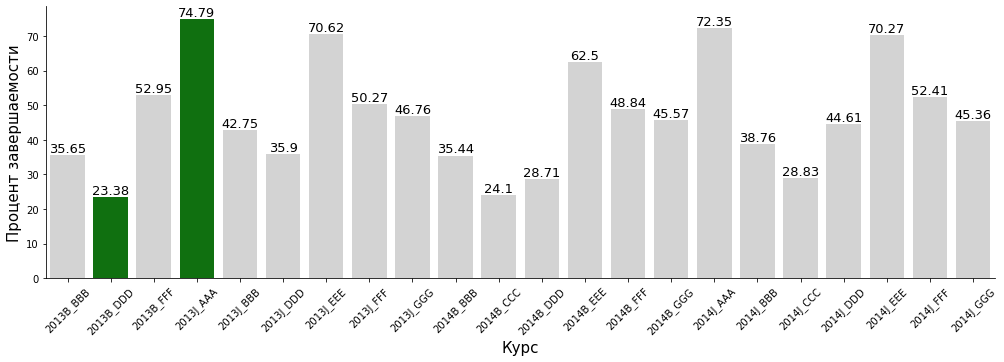

In [149]:
plt.figure(figsize = (17,5))
plt.rcParams['axes.spines.top'] = False # remove  frame's top line
plt.rcParams['axes.spines.right'] = False # remove  frame's right line

clrs = ['green' if (x == max(pass_num_test_course.proportion)) or (x == min(pass_num_test_course.proportion)) else 'lightgrey' for x in pass_num_test_course.proportion]
axes = sns.barplot(data= pass_num_test_course, x ='course', y = 'proportion', palette= clrs)
axes.tick_params(axis = 'x', rotation = 45)
axes.set_xlabel('Курс', fontsize = 15)
axes.set_ylabel('Процент завершаемости', fontsize = 15)
axes.bar_label(axes.containers[0], fontsize = 13)
plt.show()

[[go to content]](#content)
[[go to paragraph]](#task_11_2)

### 12. Задание 3<a name = "task_3">

---

Задание: По каждому предмету определи средний срок сдачи экзаменов 
- *(под сдачей понимаем последнее успешное прохождение экзамена студентом)*

---

#### 12.1 Средний срок сдачи экзамена, по каждому предмету<a name = "task_12_1">

---
    - ранее выяснили, что экзамены сдавались не по всем курсам, поэтому в первом случае рассчитаем только средний срок сдачи экзаменов по курсам, где они встречатся:

    
Sub |avg_time   
----|------
CCC |239.34
DDD	|238.0

---

- найдем студентов, которые сдавали экзамен несколько раз
- оставим только тот экзамен, который был сдан позже
- не берем в расчет тех, у кого экзамен мог быть перезасчитан `is_banked == 0`

In [150]:
df_edu.columns

Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration', 'module_presentation_length', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight', 'deadline'],
      dtype='object')

In [151]:
#собрала все индексы студентов, которые сдавали экзамен по предмету больше чем один раз

date_mean = df_edu.query('assessment_type == "Exam" & score > 40 & is_banked == 0 & date_submitted >= 0').groupby(['id_student', 'code_module']).date_submitted.size().sort_values(ascending = False).to_frame().query('date_submitted > 1')

In [152]:
date_mean

,,date_submitted
id_student,code_module,
605118,DDD,2
593903,DDD,2


In [153]:
#удалим записи студентов, которые сдавали экзамен больше 1 раза

date_avg = df_edu.query('assessment_type == "Exam" & score > 40 & is_banked == 0 & date_submitted >= 0').sort_values(by = 'date_submitted').drop_duplicates(subset = ['id_student','code_module'], keep = 'first')
date_avg.shape

(4280, 14)

In [154]:
#проверка на наличие nan

date_avg.date_submitted.isna().sum()

0

In [155]:
#проверка статистики, проверить чтобы не было явных аномалий

date_avg.date_submitted.describe()

count    4280.000000
mean      238.525701
std         5.687573
min       229.000000
25%       234.000000
50%       241.000000
75%       243.000000
max       285.000000
Name: date_submitted, dtype: float64

In [156]:
#считаем среднее время сдачи экзамена по предмету

ax_date_avg = date_avg.groupby('code_module', as_index = False)['date_submitted'].mean().round(2)
ax_date_avg.head()

,code_module,date_submitted
0,CCC,239.34
1,DDD,238.02


[Text(0, 0, '239.34'), Text(0, 0, '238.02')]

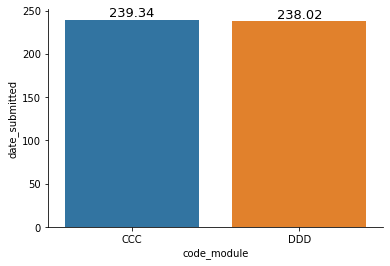

In [157]:
#barplot среднего времени сдачи предмета, основываясь только на экзамене

axes = sns.barplot(data = ax_date_avg, x = 'code_module', y = 'date_submitted')
axes.bar_label(axes.containers[0], fontsize = 13)

[[go to content]](#content)
[[go to paragraph]](#task_12_1)

#### 12.2 Средний срок сдачи курса<a name = "task_12_2">

---
Взять в расчет среднего времени сдачи курса экзамены и тесты, так как не по всем предметам внутри семестра есть экзамены.<br>
Полезной, в данном случае, являются таблица, полученная в задании 1.
- `num_test_exam`
---
***<font color = 'green'>среднее время сдачи курса отражено на гистограмме</font>***

In [158]:
#отбираю студентов, у которых оценка за тест и экзамен score >40, тесты сданы вовремя, и не учитывать досрочную сдачу и перезачеты, чтобы не смещать среднее значение
#отсортирую по возрастанию времени сдачи тестов и экзаменов

count_pass_tests = df_edu.query('score >= 40 & date_submitted<=module_presentation_length & is_banked == 0 & date_submitted >=0').sort_values(by = 'date_submitted')

#удаляю дубликаты, чтобы исключить студентов, которые сдавали один и тот же тест 2 раза. 
#Удаляю первые втречаемые повторения, чтобы остались только последние сданные тесты.
#Для себя явно указываю параметр keep = 'first', который и отвечает за удаление первых встречаемых повторений

count_pass_tests.drop_duplicates(subset = ['id_student', 'code_module', 'code_presentation', 'id_assessment', 'assessment_type'], keep= 'first', inplace = True)

#считаю сколько экзаменов и тестов сдал каждый студент и среднее время сдачи экзаменов и тестов. 
#Отрицательные значения говорят о досрочной сдачи. Поэтому среднее может сильно смещаться
count_pass_tests = (
                  count_pass_tests.
                  groupby(['id_student', 'code_presentation', 'code_module', 'assessment_type'], as_index = False).
                  agg({'id_assessment':'nunique', 'date_submitted' :'mean'}).
                  groupby(['id_student', 'code_presentation', 'code_module'], as_index = False).
                  agg({'id_assessment':'sum', 'date_submitted' :'mean'}).
                  rename(columns = {'id_assessment': 'num_tests', 'date_submitted' : 'avg_date_submitted'})
                 )
count_pass_tests.head()

,id_student,code_presentation,code_module,num_tests,avg_date_submitted
0,6516,2014J,AAA,5,111.600000
1,8462,2013J,DDD,3,55.000000
2,11391,2013J,AAA,5,112.400000
3,23629,2013B,BBB,4,55.750000
4,23698,2014J,CCC,9,160.833333


In [159]:
#объединениe таблицы с данными по сдаче тестов студентами, и тестов, которые необходимо сдать студентам

pass_modul_time = count_pass_tests.merge(num_test_exam, how = 'left', on=['code_presentation', 'code_module'], suffixes = ['_pass','_aim'])
pass_modul_time.head()

,id_student,code_presentation,code_module,num_tests_pass,avg_date_submitted_pass,num_tests_aim,avg_date_submitted_aim,module_presentation_length
0,6516,2014J,AAA,5,111.600000,5,109.062668,269.0
1,8462,2013J,DDD,3,55.000000,7,179.842926,268.0
2,11391,2013J,AAA,5,112.400000,5,109.236984,268.0
3,23629,2013B,BBB,4,55.750000,11,105.088058,240.0
4,23698,2014J,CCC,9,160.833333,9,141.561401,269.0


In [160]:
# считаем среднее кол-во дней которое понадобилось студентам для полной сдачи предмета, учитывая все типы тестов и предметы.

ax_pass_modul = pass_modul_time.query('num_tests_pass == num_tests_aim').groupby('code_module', as_index = False)['avg_date_submitted_pass'].mean().round(2)
ax_pass_modul

,code_module,avg_date_submitted_pass
0,AAA,114.85
1,BBB,113.40
2,CCC,158.19
3,DDD,167.40
4,EEE,96.08
5,FFF,125.95
6,GGG,146.42


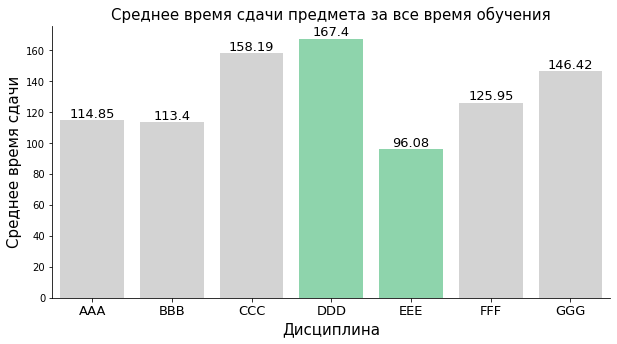

In [161]:
#график среднего времени сдачи предмета за все время обучения в течении всех сесместров

plt.figure(figsize = (10,5))
plt.rcParams['axes.spines.top'] = False # remove  frame's top line
plt.rcParams['axes.spines.right'] = False # remove  frame's right line

clrs = ['#82E0AA' if (x == max(ax_pass_modul.avg_date_submitted_pass)) or (x == min(ax_pass_modul.avg_date_submitted_pass)) else 'lightgrey' for x in ax_pass_modul.avg_date_submitted_pass]
axes = sns.barplot(data= ax_pass_modul, x ='code_module', y = 'avg_date_submitted_pass', palette= clrs)
axes.set_xlabel('Дисциплина', fontsize = 15)
axes.set_ylabel('Среднее время сдачи', fontsize = 15)
# axes.set_xticklabels(axes.get_xticks(), size=13)
axes.bar_label(axes.containers[0], fontsize = 13)
axes.set_title('Среднее время сдачи предмета за все время обучения', fontsize = 15)
plt.xticks(fontsize=13)
plt.show()
#b.set_yticklabels(b.get_yticks(), size = 15)

[[go to content]](#content)
[[go to paragraph]](#task_12_2)

### 13. Задание 4<a name = "task_4">

---
Задание: Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).

- Популярными предметами в случае сформулированного задания будут считаться, те предметы на которые больше всего зарегистрировалось уникальных студентов

    - **Популярные предметы: FFF, BBB, DDD**
    - **Не популярные предметы: FFF, DDD, CCC**
---

In [162]:
# общее кол-во регистраций с исключением NULL
# в таблице Studentregistration на первых шагах отсутствующие значения заменены на -9999, чтобы при объединении таблиц не перепутать, те кто не зарегистрировался.

popular_modul = df_edu.query('date_registration != -9999').groupby('code_module', as_index = False).agg({'date_registration':'count', 'id_student': 'nunique'}).sort_values(by = 'id_student')

#считаем пропорцию между зарегистриовавшимися студентами на конкретный курс и всеми студентами
popular_modul['proportion'] = (popular_modul.id_student / popular_modul.id_student.sum()*100).round(2)

popular_modul

,code_module,date_registration,id_student,proportion
0,AAA,3149,677,2.70
6,GGG,15219,2107,8.40
4,EEE,7892,2268,9.04
2,CCC,18939,3317,13.22
3,DDD,30859,4698,18.73
1,BBB,43032,5960,23.76
5,FFF,54815,6058,24.15


In [163]:
#общее кол-во снятий с регистрации с исключением NULL
#в таблице Studentregistration на первх шагах отсутствующие значения заменены на -9999, чтобы при объединении таблиц не перепутать, те кто не зарегистрировался.

unpopular_modul = df_edu.query('date_unregistration != -9999').groupby('code_module', as_index = False).agg({'date_unregistration':'count', 'id_student': 'nunique'}).sort_values(by = 'id_student')

#считаем пропорцию между снявшимися студентами и всеми студентами
unpopular_modul['proportion'] =( unpopular_modul.id_student / unpopular_modul.id_student.sum()*100).round(2)
unpopular_modul

,code_module,date_unregistration,id_student,proportion
0,AAA,220,88,1.97
6,GGG,270,108,2.42
4,EEE,421,234,5.24
1,BBB,2693,855,19.13
2,CCC,2531,1017,22.76
3,DDD,3523,1068,23.90
5,FFF,3397,1099,24.59


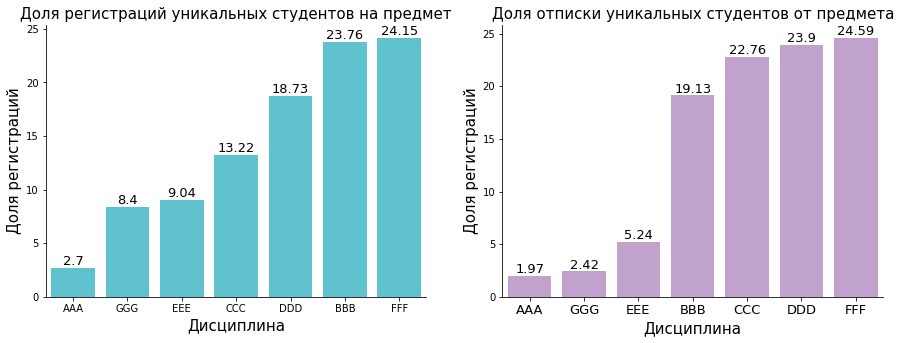

In [164]:
fig, axes = plt.subplots(nrows = 1, ncols =2, figsize = (15,5))
plt.rcParams['axes.spines.top'] = False # remove  frame's top line
plt.rcParams['axes.spines.right'] = False # remove  frame's right line

sns.barplot(data= popular_modul, x ='code_module', y = 'proportion', color = '#4DD0E1', ax = axes[0])
axes[0].set_xlabel('Дисциплина', fontsize = 15)
axes[0].set_ylabel('Доля регистраций', fontsize = 15)
# axes.set_xticklabels(axes.get_xticks(), size=13)
axes[0].bar_label(axes[0].containers[0], fontsize = 13)
axes[0].set_title('Доля регистраций уникальных студентов на предмет', fontsize = 15)

sns.barplot(data= unpopular_modul, x ='code_module', y = 'proportion', color = '#C39BD3', ax = axes[1])
axes[1].set_xlabel('Дисциплина', fontsize = 15)
axes[1].set_ylabel('Доля регистраций', fontsize = 15)
# axes.set_xticklabels(axes.get_xticks(), size=13)
axes[1].bar_label(axes[1].containers[0], fontsize = 13)
axes[1].set_title('Доля отписки уникальных студентов от предмета', fontsize = 15)

plt.xticks(fontsize=13)
plt.show()
#b.set_yticklabels(b.get_yticks(), size = 15)

---
- Среди самого популярного и одновременно не популярного оказались предеметы FFF и DDD, так как вероятно, вообще интерес к ним намного больше
- Поэтому посмотрим популярность, на основе отношения отписки к подписке
- Рассматривая такое отношение, получаем что :
    - **кол-во описок по отношению к подпискам самое большое по предметам: ССС, DDD, FFF - относительно непопулярные**
    - **кол-во регистраций по отношению к опискам больше по предметам: GGG, EEE, AAA - относительно популярные**
---

In [165]:
# расчет рейтинга курса на основе отношения кол-ва регистраций,к количеству отписок
rating_modul = unpopular_modul.merge(popular_modul, how = 'inner', on = 'code_module', suffixes = ['_un', '_pop'])

#считаем долю отписок к подпискам, по каждому предмету
rating_modul['rating'] = np.round(rating_modul.id_student_un/rating_modul.id_student_pop *100,2)
rating_modul.sort_values(by = 'rating', inplace = True)
rating_modul

,code_module,date_unregistration,id_student_un,proportion_un,date_registration,id_student_pop,proportion_pop,rating
1,GGG,270,108,2.42,15219,2107,8.40,5.13
2,EEE,421,234,5.24,7892,2268,9.04,10.32
0,AAA,220,88,1.97,3149,677,2.70,13.00
3,BBB,2693,855,19.13,43032,5960,23.76,14.35
6,FFF,3397,1099,24.59,54815,6058,24.15,18.14
5,DDD,3523,1068,23.90,30859,4698,18.73,22.73
4,CCC,2531,1017,22.76,18939,3317,13.22,30.66


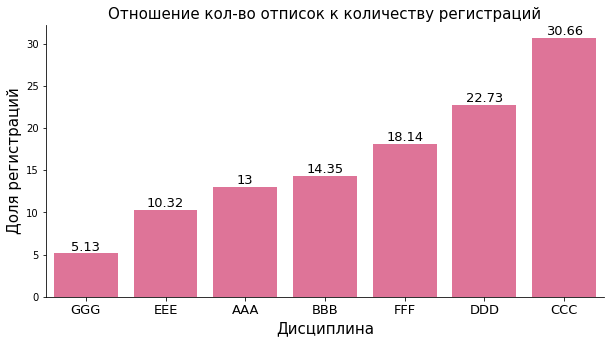

In [166]:
plt.figure(figsize = (10,5))
plt.rcParams['axes.spines.top'] = False # remove  frame's top line
plt.rcParams['axes.spines.right'] = False # remove  frame's right line

axes = sns.barplot(data= rating_modul, x ='code_module', y = 'rating', color = '#F06292')
axes.set_xlabel('Дисциплина', fontsize = 15)
axes.set_ylabel('Доля регистраций', fontsize = 15)
# axes.set_xticklabels(axes.get_xticks(), size=13)
axes.bar_label(axes.containers[0], fontsize = 13)
axes.set_title('Отношение кол-во отписок к количеству регистраций', fontsize = 15)
plt.xticks(fontsize=13)
plt.show()
#b.set_yticklabels(b.get_yticks(), size = 15)

[[go to content]](#content)
[[go to paragraph]](#task_4)

### 12. Задание 5<a name = "task_5">

---
Задача: Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.  (15 баллов)
- чтобы совместно обнаружить самый завершаемый сесметр и долгий срок сдачи определим условия:
     - тест сдан до конца семестра
     - `score` >= 40
     - перезачеты не засчитываются
     - досрочные сдачи также не засчитываются

---
- **Семестр с самой низкой завершаемостью 2013B**
- **Семестр с самым долгим временем сдачи 2014J**

In [167]:
#кол-во успешной сдачи курсов, в каждом семестре и среднее время сдачи
# используем полученную ранее таблицу pass_modul_time
pass_modul_tests = (
    pass_modul_time.query('num_tests_pass == num_tests_aim').
    groupby('code_presentation', as_index = False).
    agg({'id_student': 'count', 'avg_date_submitted_pass':'mean'}).
    rename(columns = {'id_student':'num_pass', 'avg_date_submitted_pass':'avg_pass_time'}).
    round(2).sort_values(by = ['num_pass','avg_pass_time']))
pass_modul_tests

,code_presentation,num_pass,avg_pass_time
0,2013B,1425,125.05
2,2014B,2253,129.01
1,2013J,3424,128.76
3,2014J,3981,131.34


In [168]:
#подсчет всего кол-ва сдачи курсов студентами и среднее время сдачи

num_trying_pass_tests = (
                  df_edu.groupby(['code_presentation', 'code_module', 'assessment_type'], as_index = False).
                  agg({'id_assessment':'count', 'date_submitted' :'mean'}).
                  groupby(['code_presentation'], as_index = False).
                  agg({'id_assessment':'sum'}).
                  rename(columns={'id_assessment': 'num_trying'})
                 )
num_trying_pass_tests.head()

,code_presentation,num_trying
0,2013B,33824
1,2013J,49018
2,2014B,38896
3,2014J,52174


In [169]:
#объединени таблиц с данными по сдаче курсов в семестрах
#объединяем кол-во успешных сдач курсов в семестре, с общим количеством попыток сдать курс в семестре

trying_pass_modul = pass_modul_tests.merge(num_trying_pass_tests, how = 'left', on=['code_presentation'], suffixes = ['_pass','_aim'])
trying_pass_modul.head()

,code_presentation,num_pass,avg_pass_time,num_trying
0,2013B,1425,125.05,33824
1,2014B,2253,129.01,38896
2,2013J,3424,128.76,49018
3,2014J,3981,131.34,52174


In [170]:
#рассчываем завершаемость курсов в семестре

trying_pass_modul['proportion_percentage'] = (trying_pass_modul.num_pass/ trying_pass_modul.num_trying*100).round(2)
trying_pass_modul

,code_presentation,num_pass,avg_pass_time,num_trying,proportion_percentage
0,2013B,1425,125.05,33824,4.21
1,2014B,2253,129.01,38896,5.79
2,2013J,3424,128.76,49018,6.99
3,2014J,3981,131.34,52174,7.63


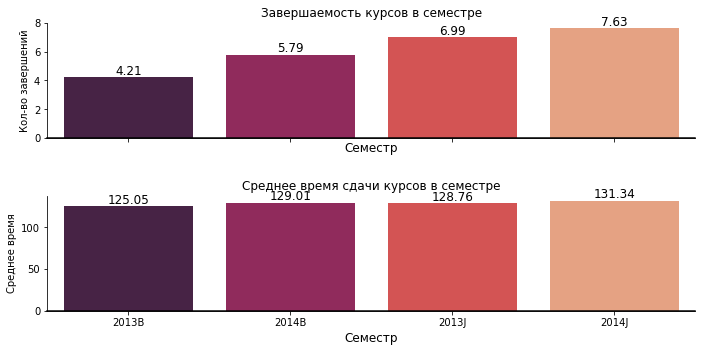

In [171]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
plt.subplots_adjust(left=0.1,
                    bottom=0.2,
                    right=1,
                    top=1,
                    wspace=0.5,
                    hspace=0.5)

sns.barplot(x=trying_pass_modul.code_presentation, y=trying_pass_modul.proportion_percentage, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Кол-во завершений")
ax1.set_xlabel('Семестр', fontsize = 12)
ax1.set_title('Завершаемость курсов в семестре')
ax1.bar_label(ax1.containers[0], fontsize = 12)

sns.barplot(x=trying_pass_modul.code_presentation, y=trying_pass_modul.avg_pass_time, palette="rocket", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_xlabel('Семестр', fontsize = 12)
ax2.set_ylabel("Среднее время")
ax2.set_title('Среднее время сдачи курсов в семестре')
ax2.bar_label(ax2.containers[0], fontsize = 12)

plt.show()

[[go to content]](#content)
[[go to paragraph]](#task_5)

### 13. Задание 6<a name = "task_6">

---

Задача: Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: 
- `R` - среднее время сдачи одного экзамена, 
- `F` - завершаемость курсов, 
- `M` - среднее количество баллов, получаемое за экзамен. 

Для каждого `RFM`-сегмента построй границы метрик `recency`, `frequency` и `monetary` для интерпретации этих кластеров.

---

Для RFM выбран последний семестр `2014J`, так как он имеет полный список предметов<br>
Так как он последний, то отражает последние тенденции обучения

- считаю сколько экзаменов и тестов сдал каждый студент и среднее время сдачи экзаменов и тестов. 
- отрицательные значения говорят о досрочной сдачи. Поэтому среднее может сильно смещаться в семестре 2014J - последний, поэтому их мы удаляем. B тем самым уберем тех, кто не смог сдать все за один семестр.
- рассчитываем кол-во уникальных тестов по каждому курсу в семесте 
- объединяем полученные таблицы с целью расчета параметров RFM

In [172]:
df_edu_drop.columns

Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration', 'module_presentation_length', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'date',
       'weight', 'deadline'],
      dtype='object')

In [173]:
# создадим, колонку, чтобы легко идентифицировать сдан ли тест

df_edu_drop['pass'] = df_edu_drop.score.map(lambda x: 1 if x >= 40 else 0)

In [174]:
# функция, которая заменяет на Null id_assessment, которые студентом сданы на score < 40

def score_control(k, y):
    if y < 40 :
        k = np.nan
    else:
        k
    return k

In [175]:
# если тест сдан на балл < 40, оставим запись об id_assessment этого теста в сроке студента, как Null , чтобы не происходил его учет

df_edu_drop['id_assessment_correct'] = df_edu_drop.apply(lambda x: score_control(x['id_assessment'], x['score']), axis = 1)

In [176]:
df_edu_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173912 entries, 0 to 180661
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   code_module                 173912 non-null  object 
 1   code_presentation           173912 non-null  object 
 2   id_student                  173912 non-null  int32  
 3   date_registration           173912 non-null  float32
 4   date_unregistration         173912 non-null  float32
 5   module_presentation_length  173912 non-null  int16  
 6   id_assessment               173912 non-null  float64
 7   date_submitted              173912 non-null  float64
 8   is_banked                   173912 non-null  float64
 9   score                       173912 non-null  float32
 10  assessment_type             173912 non-null  object 
 11  date                        173912 non-null  float32
 12  weight                      173912 non-null  float32
 13  deadline      

In [177]:
# считаем кол-во тестов, в курсе, которые были успешно сданы каждым студентом

num_pass_tests_2014J = (
    df_edu_drop.query('code_presentation == "2014J" & is_banked == 0 & date_submitted >=0 & score != -9999').
    groupby(['pass', 'id_student', 'code_presentation', 'code_module', 'assessment_type'], as_index = False).
    agg({'id_assessment_correct':'nunique', 'date_submitted' :'mean', 'score' : 'mean'}).
    groupby(['id_student', 'code_presentation', 'code_module'], as_index = False).
    agg({'id_assessment_correct':'sum', 'date_submitted' :'mean', 'score' : 'mean'})
)
num_pass_tests_2014J.head()

,id_student,code_presentation,code_module,id_assessment_correct,date_submitted,score
0,6516,2014J,AAA,5,111.600000,61.799999
1,23698,2014J,CCC,9,160.833333,75.833336
2,24734,2014J,AAA,4,100.000000,43.500000
3,25261,2014J,CCC,1,21.000000,78.000000
4,25572,2014J,DDD,1,30.500000,55.000000


In [178]:
# #

# num_pass_tests_2014J = (
#                   df_edu.query('score >= 40 & code_presentation == "2014J" & is_banked == 0 & date_submitted < module_presentation_length & date_submitted >=0').
#                   groupby(['id_student', 'code_presentation', 'code_module', 'assessment_type'], as_index = False).
#                   agg({'id_assessment':'nunique', 'date_submitted' :'mean', 'score' : 'mean'}).
#                   groupby(['id_student', 'code_presentation', 'code_module'], as_index = False).
#                   agg({'id_assessment':'sum', 'date_submitted' :'mean', 'score' : 'mean'})
#                  )
# num_pass_tests_2014J.head()

In [179]:
num_pass_tests_2014J.shape

(8816, 6)

In [180]:
# кол-во уникальных тестов в семестре по каждому курсу

num_test_exam_2014J = (
    df_edu_drop.
    query('code_presentation == "2014J"').
    groupby([ 'code_presentation', 'code_module', 'assessment_type'], as_index = False).
    agg({'id_assessment':'nunique', 'module_presentation_length' :'mean'}).
    groupby([ 'code_presentation', 'code_module'], as_index = False).
    agg({'id_assessment':'sum', 'module_presentation_length' :'mean'})
)
num_test_exam_2014J

,code_presentation,code_module,id_assessment,module_presentation_length
0,2014J,AAA,5,269.0
1,2014J,BBB,5,269.0
2,2014J,CCC,9,269.0
3,2014J,DDD,7,269.0
4,2014J,EEE,4,269.0
5,2014J,FFF,12,269.0
6,2014J,GGG,9,269.0


In [181]:
#объединяем таблицы для RFM

df_rfm = num_pass_tests_2014J.merge(num_test_exam_2014J, how = 'left', on =['code_presentation', 'code_module'], suffixes= ['_pass', '_requier'])
df_rfm

,id_student,code_presentation,code_module,id_assessment_correct,date_submitted,score,id_assessment,module_presentation_length
0,6516,2014J,AAA,5,111.600000,61.799999,5,269.0
1,23698,2014J,CCC,9,160.833333,75.833336,9,269.0
2,24734,2014J,AAA,4,100.000000,43.500000,5,269.0
3,25261,2014J,CCC,1,21.000000,78.000000,9,269.0
4,25572,2014J,DDD,1,30.500000,55.000000,7,269.0
...,...,...,...,...,...,...,...,...
8811,2694788,2014J,AAA,1,50.500000,39.250000,5,269.0
8812,2694919,2014J,BBB,5,106.200000,73.400002,5,269.0
8813,2697921,2014J,FFF,12,141.985714,78.714287,12,269.0
8814,2698577,2014J,BBB,5,106.200000,64.400002,5,269.0


---
- считаем долю завершенных курсов в семестре `df_rfm['test_proportion']`
- считаем таблицу `df_rfm_score`, которая содержит параметры о времени сдачи, завершаемости и кол-ве баллов
---

In [182]:
#доля завершенных тестов и экзаменов по предмету в рамках последненго семестра

df_rfm['test_proportion'] = df_rfm.id_assessment_correct / df_rfm.id_assessment
df_rfm.head(5)

,id_student,code_presentation,code_module,id_assessment_correct,date_submitted,score,id_assessment,module_presentation_length,test_proportion
0,6516,2014J,AAA,5,111.600000,61.799999,5,269.0,1.000000
1,23698,2014J,CCC,9,160.833333,75.833336,9,269.0,1.000000
2,24734,2014J,AAA,4,100.000000,43.500000,5,269.0,0.800000
3,25261,2014J,CCC,1,21.000000,78.000000,9,269.0,0.111111
4,25572,2014J,DDD,1,30.500000,55.000000,7,269.0,0.142857


In [183]:
# рассчитываем рабочую таблицу

df_rfm_score = df_rfm.groupby('id_student', as_index = False).agg({'date_submitted': 'mean', 'module_presentation_length': 'mean', 'score':'mean' , 'test_proportion' : 'mean'})
df_rfm_score.head()

,id_student,date_submitted,module_presentation_length,score,test_proportion
0,6516,111.600000,269.0,61.799999,1.000000
1,23698,160.833333,269.0,75.833336,1.000000
2,24734,100.000000,269.0,43.500000,0.800000
3,25261,21.000000,269.0,78.000000,0.111111
4,25572,30.500000,269.0,55.000000,0.142857


In [184]:
df_rfm_score.score.describe()

count    8497.000000
mean       68.927483
std        19.878258
min         0.000000
25%        57.000000
50%        73.500000
75%        83.750000
max       100.000000
Name: score, dtype: float64

---
- рассчитываем `recency` используя разделение на 4 равные группы, практически на 4 квантиля.
- чем раньше сдали тем лучше, поэтому у самого маленького срока будет самое большое значение
---

In [185]:
#расчет recency 

df_rfm_score['recency'] = 5-(pd.qcut(df_rfm_score.date_submitted, 4, labels = False)+1)

In [186]:
# проверка разделения
df_rfm_score.groupby('recency')['date_submitted'].agg(set)

recency
1    {163.75, 163.5, 163.625, 163.125, 163.25, 169....
2    {106.85714285714286, 107.54285714285714, 108.5...
3    {105.85714285714286, 101.9857142857143, 68.875...
4    {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, ...
Name: date_submitted, dtype: object

In [187]:
#проверка recency на равность групп

df_rfm_score.groupby('recency')['date_submitted'].agg(['mean', 'count'])

,mean,count
recency,,
1,167.769509,2124
2,128.482323,2121
3,91.822574,2126
4,37.060530,2126


In [188]:
df_rfm_score.groupby('recency')['date_submitted'].agg(set)


recency
1    {163.75, 163.5, 163.625, 163.125, 163.25, 169....
2    {106.85714285714286, 107.54285714285714, 108.5...
3    {105.85714285714286, 101.9857142857143, 68.875...
4    {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, ...
Name: date_submitted, dtype: object

In [189]:
R_border = list(zip(*df_rfm_score.groupby('recency')['date_submitted'].agg(set)))[-1]
R_border

(172.0, 122.65714285714286, 69.33333333333333, 63.333333333333336)

---
- рассчитываем `frequency`, использовать тут же метод как для расчета recency не получится, так как доля завершенных курсов намного больше и получить равные по размеру группы не получиться.
- разделение вручную на 3 группы:
    - значение 4 у группы где курсы сданы полностью
    - значение 3 где завершаемость от 0.5 до 1
    - значение 2 где  завершаемость от 0 до 0.5
---

In [190]:
df_rfm_score.groupby('test_proportion')['id_student'].count().sort_values(ascending = False).to_frame()#.hist()

,id_student
test_proportion,
1.000000,3801
0.800000,593
0.111111,263
0.888889,234
0.000000,213
...,...
0.634921,1
0.642857,1
0.650794,1


<AxesSubplot:xlabel='test_proportion', ylabel='Count'>

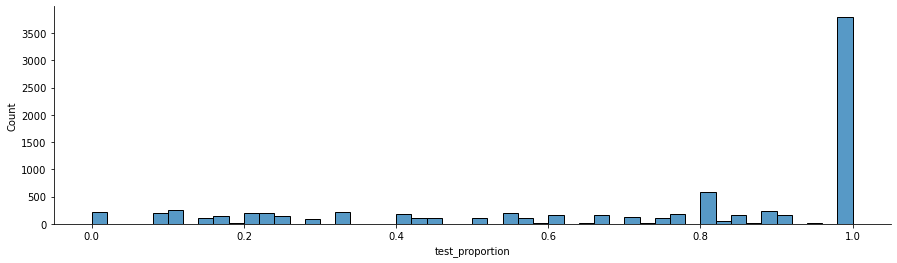

In [191]:
plt.figure(figsize = (15,4))
sns.histplot(df_rfm_score.test_proportion, bins=50)

In [192]:
# функция для разделения завершаемости на группы
def get_group(x):
    if x == 1:
        return 4
    if 0.5 <= x < 1:
        return 3
    if 0 <= x < 0.5:
        return 2

In [193]:
#применение функции и расчет frequency

df_rfm_score['frequency'] = df_rfm_score.test_proportion.apply(get_group)

In [194]:
#проверка frequency

df_rfm_score.groupby('frequency')['test_proportion'].agg(['mean', 'count'])

,mean,count
frequency,,
2,0.218714,2261
3,0.746389,2435
4,1.000000,3801


In [195]:
F_border = list(zip(*df_rfm_score.groupby('frequency')['test_proportion'].agg(set)))[-1]
F_border

(0.1111111111111111, 0.8, 1.0)

---
- рассчитываем `monetary` используя разделение на 4 равные группы, практически на 4 квантиля.
- чем больше балл, тем больше значение группы
---

In [196]:
#расчет monetary 

df_rfm_score['monetary'] = pd.qcut(df_rfm_score.score, 4, labels = False)+1

In [197]:
#проверка monetary

df_rfm_score.groupby('monetary')['score'].agg(['mean', 'count'])

,mean,count
monetary,,
1,40.533524,2126
2,66.367302,2127
3,78.751953,2124
4,90.127251,2120


In [198]:
# проверка разделения
df_rfm_score.groupby('monetary')['score'].agg(set)

monetary
1    {0.0, 1.0, 5.0, 6.5, 7.0, 8.0, 9.0, 10.0, 11.0...
2    {65.5999984741211, 65.5, 65.375, 65.4166717529...
3    {78.66666412353516, 78.4857177734375, 78.61428...
4    {85.47222900390625, 84.25714111328125, 84.7571...
Name: score, dtype: object

In [199]:
M_border = list(zip(*df_rfm_score.groupby('monetary')['score'].agg(set)))[-1]
M_border

(53.866668701171875, 72.41667175292969, 81.67143249511719, 95.33333587646484)

In [200]:
df_rfm_score.head()

,id_student,date_submitted,module_presentation_length,score,test_proportion,recency,frequency,monetary
0,6516,111.600000,269.0,61.799999,1.000000,2,4,2
1,23698,160.833333,269.0,75.833336,1.000000,1,4,3
2,24734,100.000000,269.0,43.500000,0.800000,3,3,1
3,25261,21.000000,269.0,78.000000,0.111111,4,2,3
4,25572,30.500000,269.0,55.000000,0.142857,4,2,1


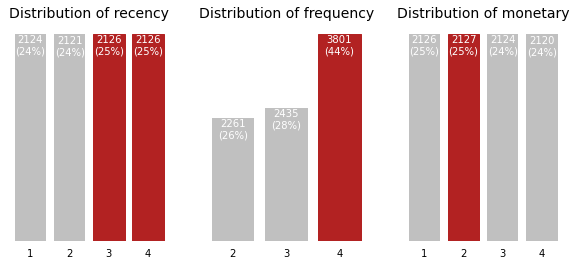

In [201]:
# распределение кол-ва студентов по кластерам

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

for i, p in enumerate(['recency', 'frequency', 'monetary']):
    parameters = {'recency':'recency', 'frequency':'frequency', 'monetary' : 'monetary'}
    y = df_rfm_score[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

---
Посмотрим распределение главных параметров среднего времени выполнения, завершаемости, среднего балла в исходном виде и в виде RFM

---

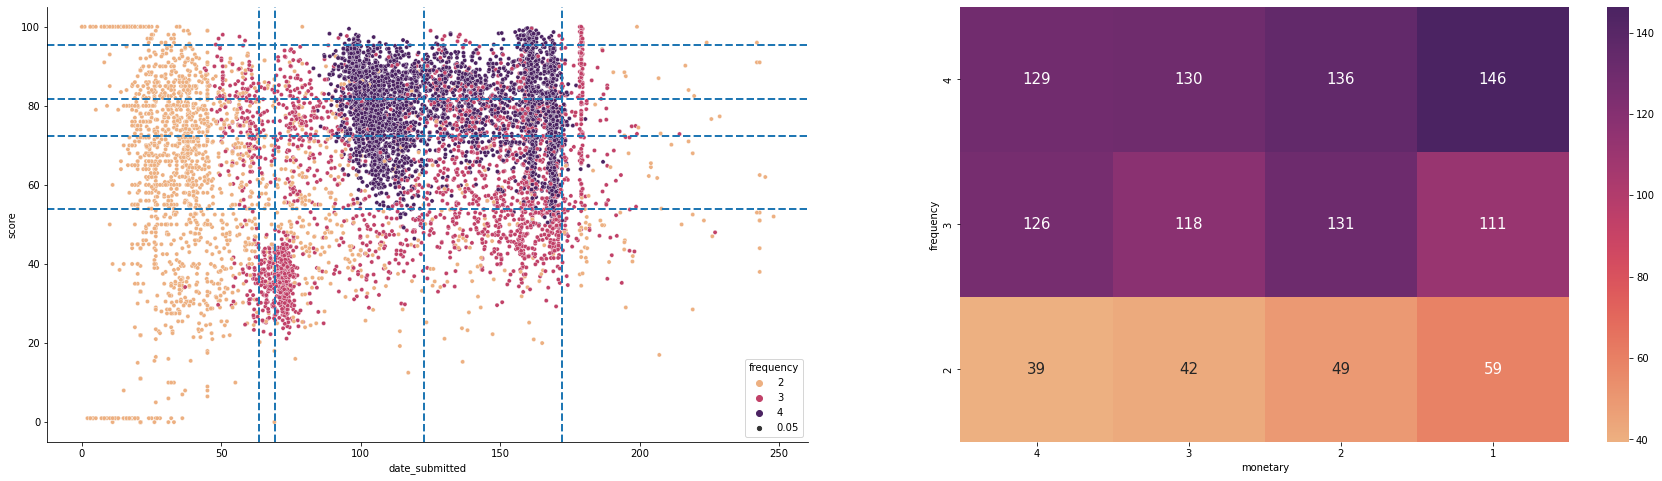

In [202]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30,8))

sns.scatterplot(data=df_rfm_score, 
                x='date_submitted', 
                y='score', 
                hue='frequency', 
                palette="flare",
                size=.05, ax = axes[0])

[axes[0].axvline(x=i, ls='--', linewidth=2) for i in R_border]
[axes[0].axhline(y=i, ls='--', linewidth=2) for i in M_border]

sns.heatmap(df_rfm_score.pivot_table(index='frequency',columns='monetary',values='date_submitted',aggfunc='mean'), 
            annot=True, 
            cmap = "flare", 
            ax = axes[1], 
            annot_kws = {'fontsize' : 15}, 
            fmt = '.0f')
axes[1].invert_yaxis()
axes[1].invert_xaxis()

plt.show()

---
Так как анализ ведется в академической среде, то критическими параметрами для условного разделения на кластеры являются:
- завершаемость или `frequency`
- средний балл  или `monetary`<br>

**Segment** | **Значения FM**    |**Описание**
:--------|:--------------------|:--------------------
**Отличная успеваемость** | **F** - 4, **M** - 4,3 | Ученики, окончившие полностью курс: средний балл **78**. Не нуждаются в мотивации, ответственно относятся к заданиям.
**Удовлетворительная успеваемость** |**F** - 3, 4, **M** - 1-2 | Ученики, окончившие курс либо полностью, либо с небольшим отстованием: достаточно низкие баллы ниже **71**. Часть нуждается в небольшой помощи с распределением времени, чтобы успевать сдавать тесты, часть в дополнительном времени на изучение предметов.
**Достаточно хорошая успеваемость** | **F** - 3 **M** - 4 | Старательные ученики, которые сдают тесты в среднем на **81** балл, но не успевают сдать все тесты. Нуждаются в дополнительном времени.
**Требуют поддержки** | **F** - 2,3 **M** - 3,4| Ученики, которые не справляются с тем, чтобы полностью сдать все тесты в курсе, но могут получать высокие баллы за тесты.
**Нуждаются в академическом отпуске или собираются отчисляться** |  **F** - 2,3 **M** - 1,2| Студенты, которые имеют достаточно много академ.долгов и не высокие баллы. Риск, что уйдут в академ или бросят курс.

---

In [203]:
# создание колонки по разделению на кластеры

segt_map = {
    r'4[3-4]': 'отличная успеваемость',
    r'[3-4][1,2]': 'удовлетворительная успеваемость',
    r'34' : 'достаточно хорошая успеваемость',
    r'2[3-4]': 'требуют поддержки',
    r'33':'требуют поддержки',
    r'[2-3][1-2]': 'нуждаются в академическом отпуске или собираются отчисляться'
}

df_rfm_score['for_segmentation'] = df_rfm_score['frequency'].map(str) + df_rfm_score['monetary'].map(str)
df_rfm_score['Segment'] = df_rfm_score['for_segmentation'].replace(segt_map, regex=True)
df_rfm_score.head()

,id_student,date_submitted,module_presentation_length,score,test_proportion,recency,frequency,monetary,for_segmentation,Segment
0,6516,111.600000,269.0,61.799999,1.000000,2,4,2,42,удовлетворительная успеваемость
1,23698,160.833333,269.0,75.833336,1.000000,1,4,3,43,отличная успеваемость
2,24734,100.000000,269.0,43.500000,0.800000,3,3,1,31,удовлетворительная успеваемость
3,25261,21.000000,269.0,78.000000,0.111111,4,2,3,23,требуют поддержки
4,25572,30.500000,269.0,55.000000,0.142857,4,2,1,21,нуждаются в академическом отпуске или собирают...


In [204]:
#просмотр размеров кластеров.

rfm_claster = df_rfm_score.groupby('Segment', as_index =False)['id_student'].count().rename(columns = {'id_student' : 'count'})
rfm_claster

,Segment,count
0,достаточно хорошая успеваемость,315
1,нуждаются в академическом отпуске или собирают...,1503
2,отличная успеваемость,2728
3,требуют поддержки,1201
4,удовлетворительная успеваемость,2750


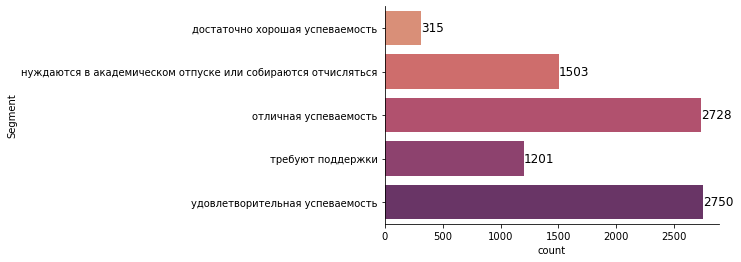

In [205]:
ax = sns.barplot(x = rfm_claster['count'], y = rfm_claster.Segment, palette="flare")

# ax.axhline(0, color="k", clip_on=False)
# ax.set_xlabel('Семестр', fontsize = 12)
# ax.set_ylabel("Среднее время")
# ax.set_title('Среднее время сдачи курсов в семестре')

ax.bar_label(ax.containers[0], fontsize = 12)
# plt.xticks(rotation = 90)
plt.show()

[[go to content]](#content)
[[go to paragraph]](#task_6)